# <b>Requirements</b>
In this project, I am presumably a data analyst/data scientist at
Properati. I want to explore, analyze, draw useful conclusions/suggestions 
with a comprehensive report for the company’s customers
about renting real estates in Mexico.

In [2]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats as st

* Let's load the data and have a look at it.

In [3]:
df = pd.read_csv('Mexico_real_estate_rent_listings_2017_2018.csv')
df.head()

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses,title
0,8780778cce123516df05c18355d4557b2aa9b19f,2017-02-10,rent,house,Hidalgo,|México|Hidalgo|,México,Hidalgo,20.068350,-98.793564,12000.0,MXN,12006.10,665.14,236.0,2.818390,50.847458,NaN,NaN,Casa - Hangares Pachuca Hidalgo
1,9c0e6b5ba93240f9d21a3ed3382032e73fc5443b,2017-02-02,rent,house,Hidalgo,|México|Hidalgo|,México,Hidalgo,20.068350,-98.793564,18000.0,MXN,18009.16,997.71,250.0,3.990840,72.000000,NaN,NaN,RENTO CASA EN PRIVADA EXCLUSIVA
2,4634c75cf839f9e8a415fe06d33fdb4f4cebe150,2017-02-18,rent,house,Hidalgo,|México|Hidalgo|,México,Hidalgo,20.108408,-98.789429,8000.0,MXN,8003.95,443.42,120.0,3.695167,57.142857,NaN,NaN,EXCELENTE CASA RESIDENCIAL EN RENTA
3,21a24f4e793ce505ce6f416890b5784f4dac2cc2,2017-02-27,rent,house,Hidalgo,|México|Hidalgo|,México,Hidalgo,20.108408,-98.789429,10000.0,MXN,9661.16,535.23,0.0,NaN,NaN,NaN,NaN,RENTO CASA EN RINCÓN DE LA PLATA
4,e629c76ba5531f90bac04b564773ee8b505d99aa,2017-01-14,rent,apartment,Hidalgo,|México|Hidalgo|,México,Hidalgo,20.108408,-98.789429,15000.0,MXN,15007.54,831.42,100.0,8.314200,NaN,NaN,NaN,"DEPARTAMENTO AMUEBLADO, ZONA PLATEADA, PACHUCA"


In [4]:
df.tail()

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses,title
362518,01f000eb8d9b35bd96200c301bd9bf066d8bc308,2017-09-28,rent,store,Naucalpan de Juárez,|México|Estado de México|Naucalpan de Juárez|,México,Estado de México,19.503453,-99.243561,220000.0,MXN,219150.10,11137.77,560.0,19.888875,NaN,NaN,NaN,LOCAL BIEN UBICADO FRENTE A PLAZA SATÉLITE EN ...
362519,c894b58bf6e7dcd13249a6817c46ab7ab081b158,2017-08-04,rent,store,Guadalajara,|México|Jalisco|Guadalajara|,México,Jalisco,20.696918,-103.386887,220000.0,MXN,219150.10,11137.77,0.0,NaN,200.000000,NaN,NaN,Local Comercial en Providencia
362520,3a832a2cb3bd38abdf46fdbf69525345e27fdc2d,2017-11-10,rent,store,Veracruz,|México|Veracruz de Ignacio de la Llave|Veracruz|,México,Veracruz de Ignacio de la Llave,19.148433,-96.106983,220000.0,MXN,219150.10,11137.77,1224.0,9.099485,NaN,NaN,NaN,Oportunidad Terreno Comercial en Renta en Blvd...
362521,fec8481acf21a7f44e025a10f9419e21cb89147c,2017-09-21,rent,store,Monterrey,|México|Nuevo León|Monterrey|,México,Nuevo León,25.674639,-100.311898,220000.0,MXN,219150.10,11137.77,732.0,15.215533,91.666667,NaN,NaN,Bodega en Renta en el Centro de Monterrey Nuev...
362522,6ce56201dda67a94fa7906cd2bb482b1a1e9a7c1,2017-12-09,rent,house,Toluca,|México|Estado de México|Toluca|,México,Estado de México,19.282610,-99.655665,440000.0,MXN,438300.21,22275.54,0.0,NaN,166.037736,NaN,NaN,EDIFICIO EN TOLUCA EN RENTA. COMPLETO O POR NI...


* '`id`' looks like a hash code and apparantly it is irreversable. 
* '`place_with_parent_names`' also is a combination of '`country_name`' and '`state_name`', and it does not look to be of any value. 
* '`country_name`' is the same for all the data.
* So let's remove them !

In [5]:
df.drop(['id', 'place_with_parent_names', 'country_name'], axis=1, inplace=True)

* First of all, we have to distinguish the categorical and quantitative columns. 

In [6]:
def check_variables(df):
    cols = df.columns
    quantitative_cols = df._get_numeric_data().columns
    categorical_cols = list(set(cols) - set(quantitative_cols))
    return categorical_cols, list(set(quantitative_cols))

cat_cols, quant_cols = check_variables(df)
print(f'categorical columns: {cat_cols}')
print(f'quantitativecolumns: {quant_cols}')

categorical columns: ['title', 'created_on', 'property_type', 'state_name', 'place_name', 'operation', 'currency']
quantitativecolumns: ['price_aprox_usd', 'expenses', 'price_per_m2', 'price_aprox_local_currency', 'price', 'lon', 'price_usd_per_m2', 'lat', 'rooms', 'surface_total_in_m2']


In [7]:
df.shape

(362523, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362523 entries, 0 to 362522
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   created_on                  362523 non-null  object 
 1   operation                   362523 non-null  object 
 2   property_type               362523 non-null  object 
 3   place_name                  362523 non-null  object 
 4   state_name                  362523 non-null  object 
 5   lat                         267835 non-null  float64
 6   lon                         267835 non-null  float64
 7   price                       348374 non-null  float64
 8   currency                    348291 non-null  object 
 9   price_aprox_local_currency  348374 non-null  float64
 10  price_aprox_usd             348374 non-null  float64
 11  surface_total_in_m2         194070 non-null  float64
 12  price_usd_per_m2            107778 non-null  float64
 13  price_per_m2  

In [9]:
df.isnull().sum()

created_on                         0
operation                          0
property_type                      0
place_name                         0
state_name                         0
lat                            94688
lon                            94688
price                          14149
currency                       14232
price_aprox_local_currency     14149
price_aprox_usd                14149
surface_total_in_m2           168453
price_usd_per_m2              254745
price_per_m2                   81128
rooms                         349728
expenses                      358945
title                              0
dtype: int64

* There are 362523 rows of data, 20 columns and features, for which, 11 of them has missing value. 
* I removed 3 columns that I thik are not valuable. Since dataset already is for Mexico, so there is no need to keep it. Also the state name is repeated in place with parent name, so later one also is removed. Lastly id is removed because it looks like a hash code which is not recoverable. 
* The most missing values belong to `expenses` and `rooms` features, with 99 and 96 percent of data loss. 
* The next two features with high missing value rate are `price_usd_perPm2` and `surface_total_in_m2`, 70 and 46 percent respectively. 
* Also there can be seen 3 features with the same amount of Null values, 14149, and two features with 94688.  

## Let's handle the Null values for surface in square meters. 
* It is clear that there is a simple formula for a property's price:
<p>Price = Price of each square meter * total surface</p>

* I am trying to extract the rows in which '`surface_total_in_m2`' has Null or zero value and '`price_per_me`' is not Null. 
* This way, I can replace '`surface_total_in_m2`' with division of '`price`' by '`preic_per_m2`'. 

In [10]:
df[((df.surface_total_in_m2.isnull()) | (df.surface_total_in_m2==0)) & (df.price_per_m2.notnull()) & (df.price.notnull())].head()

,created_on,operation,property_type,place_name,state_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses,title
17,2017-02-18,rent,house,Jalisco,Jalisco,NaN,NaN,22000.0,MXN,22128.82,1225.94,NaN,NaN,72.131148,NaN,NaN,Casa en Renta en Santa Sofia Haciendas Country...
18,2017-01-28,rent,house,Jalisco,Jalisco,20.656200,-103.226185,10000.0,MXN,10005.03,554.28,NaN,NaN,90.909091,NaN,NaN,Casa en Renta en Coyula
19,2017-01-28,rent,house,Jalisco,Jalisco,20.648262,-103.222375,10000.0,MXN,10005.03,554.28,NaN,NaN,71.428571,NaN,NaN,Casa en Renta en Rancho la Cruz
20,2017-02-09,rent,house,Jalisco,Jalisco,20.669785,-103.238937,45000.0,MXN,45022.82,2494.27,NaN,NaN,132.352941,NaN,NaN,Casa en Renta en Tonala
25,2017-02-01,rent,house,Tabasco,Tabasco,18.000532,-92.946320,13000.0,MXN,13006.46,720.56,NaN,NaN,13000.000000,NaN,NaN,"Casa en Renta Tabasco 2000, fracc. los Rios"


In [11]:
idx = df[((df.surface_total_in_m2.isnull()) | (df.surface_total_in_m2==0)) & (df.price_per_m2.notnull()) & (df.price.notnull())].index

In [12]:
df.iloc[idx][['price', 'surface_total_in_m2', 'price_per_m2']].head()

,price,surface_total_in_m2,price_per_m2
17,22000.0,NaN,72.131148
18,10000.0,NaN,90.909091
19,10000.0,NaN,71.428571
20,45000.0,NaN,132.352941
25,13000.0,NaN,13000.000000


In [13]:
df.loc[idx,'surface_total_in_m2'] = df.loc[idx,'price'] / df.loc[idx,'price_per_m2']

In [14]:
df.iloc[idx][['price', 'surface_total_in_m2', 'price_per_m2']].head()

,price,surface_total_in_m2,price_per_m2
17,22000.0,305.0,72.131148
18,10000.0,110.0,90.909091
19,10000.0,140.0,71.428571
20,45000.0,340.0,132.352941
25,13000.0,1.0,13000.000000


In [15]:
df.isnull().sum()

created_on                         0
operation                          0
property_type                      0
place_name                         0
state_name                         0
lat                            94688
lon                            94688
price                          14149
currency                       14232
price_aprox_local_currency     14149
price_aprox_usd                14149
surface_total_in_m2             5492
price_usd_per_m2              254745
price_per_m2                   81128
rooms                         349728
expenses                      358945
title                              0
dtype: int64

* Now the number of '`surface_total_in_m2`' with Null and zero values has reduced to <b>5492</b>. Much better !

## The same can happen for price-related columns in usd currency. 

In [16]:
df[((df.surface_total_in_m2!=0) & (df.surface_total_in_m2.notnull())) & (df.price_usd_per_m2.isnull()) & (df.price_aprox_usd.notnull())].head()

,created_on,operation,property_type,place_name,state_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses,title
17,2017-02-18,rent,house,Jalisco,Jalisco,NaN,NaN,22000.0,MXN,22128.82,1225.94,305.0,NaN,72.131148,NaN,NaN,Casa en Renta en Santa Sofia Haciendas Country...
18,2017-01-28,rent,house,Jalisco,Jalisco,20.656200,-103.226185,10000.0,MXN,10005.03,554.28,110.0,NaN,90.909091,NaN,NaN,Casa en Renta en Coyula
19,2017-01-28,rent,house,Jalisco,Jalisco,20.648262,-103.222375,10000.0,MXN,10005.03,554.28,140.0,NaN,71.428571,NaN,NaN,Casa en Renta en Rancho la Cruz
20,2017-02-09,rent,house,Jalisco,Jalisco,20.669785,-103.238937,45000.0,MXN,45022.82,2494.27,340.0,NaN,132.352941,NaN,NaN,Casa en Renta en Tonala
25,2017-02-01,rent,house,Tabasco,Tabasco,18.000532,-92.946320,13000.0,MXN,13006.46,720.56,1.0,NaN,13000.000000,NaN,NaN,"Casa en Renta Tabasco 2000, fracc. los Rios"


In [17]:
idx = df[((df.surface_total_in_m2!=0) & (df.surface_total_in_m2.notnull())) & (df.price_usd_per_m2.isnull()) & (df.price_aprox_usd.notnull())].index

In [18]:
df.loc[idx, 'price_usd_per_m2'] = df.loc[idx, 'price_aprox_usd'] / df.loc[idx, 'surface_total_in_m2']

In [19]:
df.loc[idx, ['price_usd_per_m2', 'price_aprox_usd', 'surface_total_in_m2']].head()

,price_usd_per_m2,price_aprox_usd,surface_total_in_m2
17,4.019475,1225.94,305.0
18,5.038909,554.28,110.0
19,3.959143,554.28,140.0
20,7.336088,2494.27,340.0
25,720.560000,720.56,1.0


In [20]:
df.isnull().sum()

created_on                         0
operation                          0
property_type                      0
place_name                         0
state_name                         0
lat                            94688
lon                            94688
price                          14149
currency                       14232
price_aprox_local_currency     14149
price_aprox_usd                14149
surface_total_in_m2             5492
price_usd_per_m2               62271
price_per_m2                   81128
rooms                         349728
expenses                      358945
title                              0
dtype: int64

* Now the number of '`price_usd_per_m2`' has reduced from 254745 to 62271. Almost 75% improved! 

## There are some rows in which `'price_per_m2'` has NAN, but `'price_usd_per_m2'` is not NAN. 
* If I devide price in local currency by price in usd, I will get the exchange rate at that date. 
* Then I can apply it to the price usd per m2 and get the local price per m2

In [21]:
df[(df.price_per_m2.isnull()) & (df.price_aprox_local_currency.notnull()) & (df.price_aprox_usd.notnull()) & (df.price_usd_per_m2.notnull())].head()

,created_on,operation,property_type,place_name,state_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses,title
4,2017-01-14,rent,apartment,Hidalgo,Hidalgo,20.108408,-98.789429,15000.0,MXN,15007.54,831.42,100.0,8.314200,NaN,NaN,NaN,"DEPARTAMENTO AMUEBLADO, ZONA PLATEADA, PACHUCA"
45,2017-01-11,rent,apartment,Tabasco,Tabasco,18.012753,-92.921341,14500.0,MXN,14507.36,803.71,125.0,6.429680,NaN,NaN,NaN,DEPARTAMENTO EN RENTA AMUEBLADO
66,2017-02-03,rent,apartment,Tabasco,Tabasco,18.004882,-92.927896,8000.0,MXN,8003.95,443.42,120.0,3.695167,NaN,NaN,NaN,Departamento en Renta Colonia Magisterial
71,2017-01-21,rent,apartment,Tabasco,Tabasco,18.019955,-92.990608,11000.0,MXN,11005.57,609.71,189.0,3.225979,NaN,NaN,NaN,DEPARTAMENTO O CONDOMINIO EN RESIDENCIAL EL CO...
93,2017-01-28,rent,apartment,Tabasco,Tabasco,17.995392,-92.931456,20000.0,MXN,20010.06,1108.56,155.0,7.152000,NaN,NaN,NaN,SE RENTA DEPARTAMENTO EN PRIVADA REAL DE LA SI...


In [22]:
idx = df[(df.price_per_m2.isnull()) & (df.price_aprox_local_currency.notnull()) & (df.price_aprox_usd.notnull()) & (df.price_usd_per_m2.notnull())].index

In [23]:
df.loc[idx, 'price_per_m2'] = df.loc[idx, 'price_usd_per_m2'] * df.loc[idx, 'price_aprox_local_currency'] / df.loc[idx, 'price_aprox_usd']

In [24]:
df.loc[idx, ['price_per_m2', 'price_usd_per_m2', 'price_aprox_usd', 'price_aprox_local_currency']].head()

,price_per_m2,price_usd_per_m2,price_aprox_usd,price_aprox_local_currency
4,150.075400,8.314200,831.42,15007.54
45,116.058880,6.429680,803.71,14507.36
66,66.699583,3.695167,443.42,8003.95
71,58.230529,3.225979,609.71,11005.57
93,129.097161,7.152000,1108.56,20010.06


In [25]:
df.isnull().sum()

created_on                         0
operation                          0
property_type                      0
place_name                         0
state_name                         0
lat                            94688
lon                            94688
price                          14149
currency                       14232
price_aprox_local_currency     14149
price_aprox_usd                14149
surface_total_in_m2             5492
price_usd_per_m2               62271
price_per_m2                   62307
rooms                         349728
expenses                      358945
title                              0
dtype: int64

`'price_per_m2'` is downsized to 62307. Another improvement !

## Let's check the currency field. 

In [26]:
df.currency.describe()

count     348291
unique         2
top          MXN
freq      333504
Name: currency, dtype: object

* There are 14232 rows in dataset with Null values for currency variable. 
* I am going to check if there is any row of data that has the price (be it in MXN or USD) but has no currency. 

In [27]:
df[(df.currency.isnull()) & ((df.price.notnull()) & (df.price!=0))]

,created_on,operation,property_type,place_name,state_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses,title


* Empty table!
* This means All of the rows with Null value for currency, are either having price of 0.0 or Null, which means there were no entry for the price for these items. 

## `expenses` has a huge amount of missing values. I give a check to that!

In [28]:
df[df.expenses.notnull()].head()

,created_on,operation,property_type,place_name,state_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses,title
484,2017-02-07,rent,house,Puebla,Puebla,19.027694,-98.235824,20000.0,MXN,19654.46,1088.86,170.0,6.405059,115.614471,NaN,600.0,Renta Casa Fracc La Cima Zona de Angelopolis
487,2017-02-07,rent,house,Puebla,Puebla,18.997470,-98.266886,45000.0,MXN,44222.46,2449.93,291.0,8.419003,151.967216,NaN,1400.0,Renta Casa Fracc Lomas de Angelopolis
506,2017-02-07,rent,house,Puebla,Puebla,19.113360,-98.264438,26000.0,MXN,26152.28,1448.84,170.0,8.522588,153.836941,NaN,600.0,Renta Casa Fracc. La Cima Ubicado en la Zona d...
507,2017-02-07,rent,house,Puebla,Puebla,19.113360,-98.264438,20000.0,MXN,19654.46,1088.86,170.0,6.405059,115.614471,NaN,600.0,"Renta Casa en Fraccionamiento La Cima, zona de..."
699,2017-02-28,rent,apartment,Zapopan,Jalisco,NaN,NaN,25000.0,MXN,24567.99,1361.07,0.0,NaN,NaN,NaN,5000.0,LOMAS DEL VALLE (VISTAS DEL VALLE)


In [29]:
print(df.operation.value_counts())
print(df.operation.nunique())

rent    362523
Name: operation, dtype: int64
1


* So there is only one value for operation and it is 'rent'. There is no information in it, so drop it. 

In [30]:
df.drop('operation', axis=1, inplace=True)

* There are 5 rows of data that are having negative values for price_usd_per_m2. So for irrationality reason, I just remove those rows. 

In [31]:
df[df.price_usd_per_m2<0]

,created_on,property_type,place_name,state_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses,title
47663,2017-05-25,house,Tlaxcala,Tlaxcala,19.292402,-98.259590,3000.0,MXN,3001.43,166.28,-112.0,-1.484643,30.000000,NaN,NaN,RENTA DE CASA EN ACUITLAPILCO
138876,2017-07-28,apartment,Naucalpan de Juárez,Estado de México,19.515202,-99.248764,6300.0,MXN,6416.80,351.23,-4.0,-87.807500,146.511628,NaN,NaN,Departamento de 1 recamara en Naucalpan CON EX...
190793,2017-07-28,apartment,Naucalpan de Juárez,Estado de México,19.515202,-99.248764,6300.0,MXN,6303.04,354.47,-4.0,-88.617500,146.511628,NaN,NaN,Departamento de 1 recamara en Naucalpan CON EX...
203182,2017-05-25,house,Tlaxcala,Tlaxcala,19.292402,-98.259590,3000.0,MXN,3001.43,166.28,-112.0,-1.484643,30.000000,NaN,NaN,RENTA DE CASA EN ACUITLAPILCO
299227,2017-10-05,house,Toluca,Estado de México,19.289399,-99.648167,6500.0,MXN,6426.40,337.50,-1.0,-337.500000,-6426.400000,NaN,NaN,CASA EN RENTA COL. CENTRO TOLUCA
330356,2017-07-28,apartment,Naucalpan de Juárez,Estado de México,19.515202,-99.248764,6300.0,MXN,6228.57,327.11,-4.0,-81.777500,146.511628,NaN,NaN,Departamento de 1 recamara en Naucalpan CON EX...


In [32]:
df.drop([47663,138876,190793,203182,299227,330356], axis=0, inplace=True)

In [33]:
df[df.price_usd_per_m2<0]

,created_on,property_type,place_name,state_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses,title


# Time to do the <b style=color:blue>STATISTICS<b>

## I. First, I am going to investigate each variable individually.

### <b style=color:red>A. Categorical variables</b>

#### <p style=color:yellow>1. Property Type</p>

In [34]:
print(f'describe:\n{df.property_type.describe()}')
print(f'\nvalue counter:\n{df.property_type.value_counts()}')

describe:
count     362517
unique         4
top        house
freq      159598
Name: property_type, dtype: object

value counter:
house        159598
apartment    125101
store         77792
PH               26
Name: property_type, dtype: int64


<AxesSubplot:ylabel='property_type'>

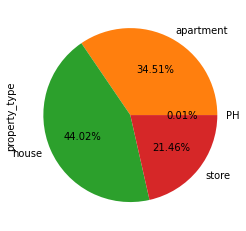

In [35]:
df.groupby('property_type').size().plot(kind='pie', ylabel='property_type', autopct='%.2f%%')

[Text(0, 0, '26'),
 Text(0, 0, '125101'),
 Text(0, 0, '159598'),
 Text(0, 0, '77792')]

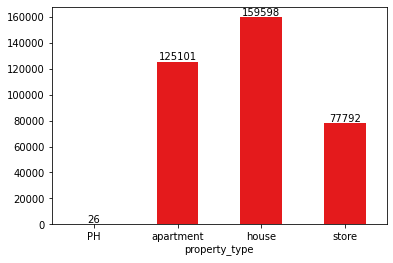

In [36]:
ax = df.groupby('property_type').size().plot(kind='bar', rot=0, colormap='Set1')
ax.bar_label(ax.containers[0]) 

* No missing value
* 4 categories
* Mostly in houses 

#### <p style=color:yellow>2. Place name </p>

In [37]:
print(f'describe:\n{df.place_name.describe()}')
print(f'\nvalue counter:\n{df.place_name.value_counts()}')

describe:
count               362517
unique                2681
top       Distrito Federal
freq                 33992
Name: place_name, dtype: object

value counter:
Distrito Federal    33992
Veracruz            22184
Querétaro           20522
Mérida              17429
Coahuila            11947
                    ...  
La Ceiba                1
Isla Mujeres            1
Calvillo                1
Ebano                   1
Angel Zimbron           1
Name: place_name, Length: 2681, dtype: int64


* This feature has no Null values. 
* As there are 2681 uniqe values in this variable, it can not be placed in a bar plot or pie chart. 
* So I devide this values in two halvs. First half consist of top 14 places that almost has the 50% of the values. 
* And the other half is the sum of the rest of the values. 

In [38]:
places = pd.DataFrame(df.place_name.value_counts())
places[:14].sum() 

place_name    181093
dtype: int64

In [39]:
first_half_places = places[:14]
sum_of_rest = pd.DataFrame({'place_name':places[14:].sum(), 'Others':'Others'}).set_index(['Others'])
places = first_half_places.append(sum_of_rest)
places

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7372\51992407.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  places = first_half_places.append(sum_of_rest)


,place_name
Distrito Federal,33992
Veracruz,22184
Querétaro,20522
Mérida,17429
Coahuila,11947
Puebla,11328
Monterrey,10666
Cuernavaca,9283
San Pedro Garza García,8106
Chihuahua,7938


15


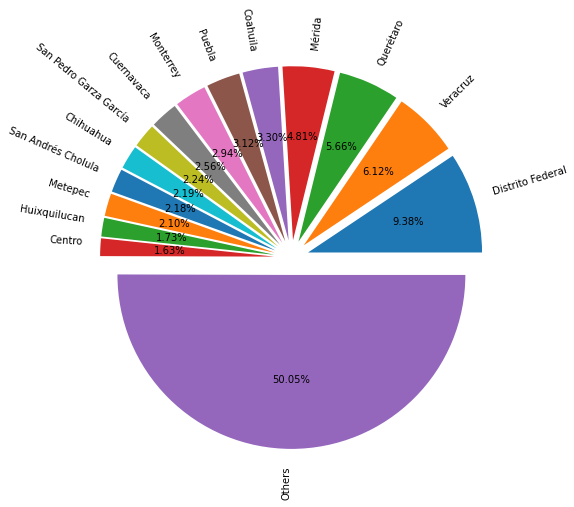

In [40]:
explodes = [.1,.1,.1,.1,.1,.1,.1,.1,.1,.1,.1,.1,.1,.1,.1]
print(len(places))
plt.figure(figsize=(16,8))
plt.pie(x=places.place_name, labels=places.index, autopct='%.2f%%', rotatelabels=90, explode=explodes)
plt.show()

* So this is how the places are distributed. 
* In the next cell, it is showed how the top 14 places are divided. 

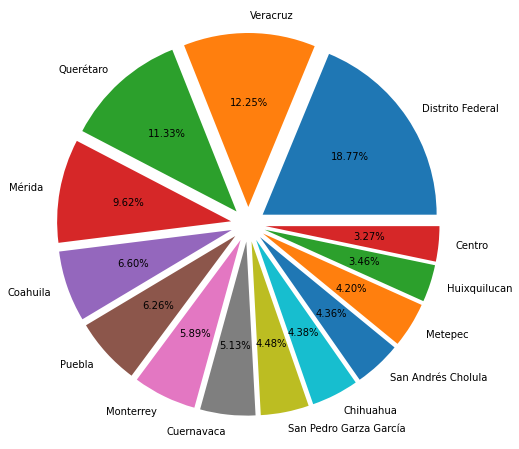

In [41]:
plt.figure(figsize=(16,8))
plt.pie(x=places[:14].place_name[:14], labels=places[:14].index[:14], explode=explodes[:14], autopct='%.2f%%')
plt.show() 

#### <p style=color:yellow>3. State name </p>

In [42]:
print(f'describe:\n{df.state_name.describe()}')
print(f'\nvalue counter:\n{df.state_name.value_counts()}')

describe:
count              362517
unique                 33
top       Baja California
freq                39994
Name: state_name, dtype: object

value counter:
Baja California                    39994
Estado de México                   39857
Veracruz de Ignacio de la Llave    34199
Querétaro                          30698
Nuevo León                         29595
Puebla                             27329
Yucatán                            21342
Distrito Federal                   17069
Morelos                            16537
Guerrero                           11169
Guanajuato                         10765
Quintana Roo                       10097
Tabasco                            10029
Jalisco                             9641
Tamaulipas                          9417
Chiapas                             9141
Chihuahua                           8015
San Luis Potosí                     4640
Campeche                            3910
Sinaloa                             3176
Aguascalientes    

* There is no Null values in this feature. 
* As there are 33 uniqe values in state_name variable, it can not be placed in a bar plot or pie chart. 
* So I devide this values in two halvs. First half consist of top 9 places that almost has the 71% of the values. 
* And the other half is the sum of the rest of the values. 

In [43]:
states = pd.DataFrame(df.state_name.value_counts())
states[:9].sum()

state_name    256620
dtype: int64

In [44]:
first_half_states = states[:9]
sum_of_rest = pd.DataFrame({'state_name':states[9:].sum(), 'Others':'Others'}).set_index(['Others'])
states = first_half_states.append(sum_of_rest)
states

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7372\94961145.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  states = first_half_states.append(sum_of_rest)


,state_name
Baja California,39994
Estado de México,39857
Veracruz de Ignacio de la Llave,34199
Querétaro,30698
Nuevo León,29595
Puebla,27329
Yucatán,21342
Distrito Federal,17069
Morelos,16537
Others,105897


10


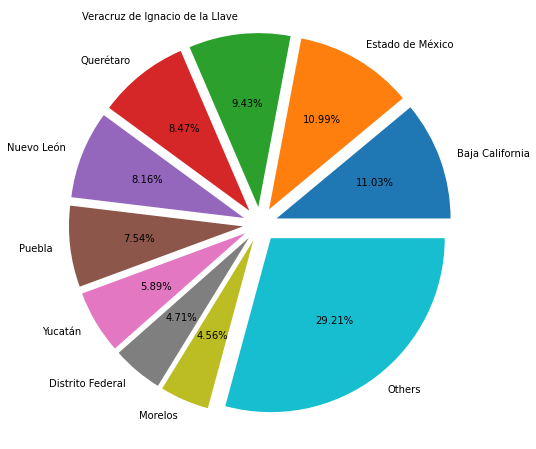

In [45]:
explodes = [.1,.1,.1,.1,.1,.1,.1,.1,.1,.1]
print(len(states))
plt.figure(figsize=(16,8))
plt.pie(x=states.state_name, labels=states.index, autopct='%.2f%%', explode=explodes)
plt.show()

* So this is how the states proportions are distributed. 
* In the next cell, it is showed how the top 9 states proportions are divided. 

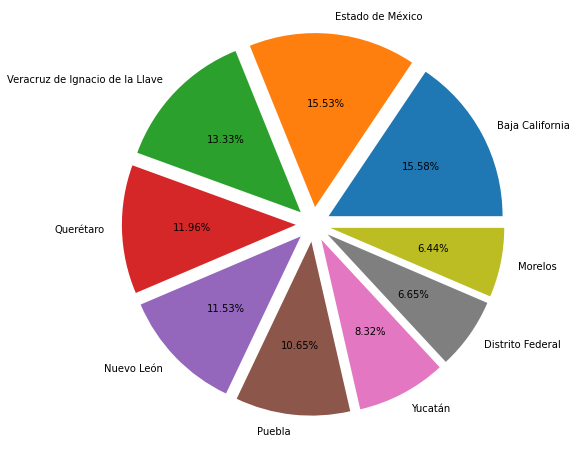

In [46]:
plt.figure(figsize=(16,8))
plt.pie(x=states[:14].state_name[:9], labels=states[:9].index[:14], explode=explodes[:9], autopct='%.2f%%')
plt.show() 

#### <p style=color:yellow>4. Currency</p>

In [47]:
print(f'describe:\n{df.currency.describe()}')
print(f'\nvalue counter:\n{df.currency.value_counts()}')

describe:
count     348285
unique         2
top          MXN
freq      333498
Name: currency, dtype: object

value counter:
MXN    333498
USD     14787
Name: currency, dtype: int64


* 14232 rows of the dataset have Null values for this feature. 
* There are just 2 categories for currency, MXN and USD. 

<AxesSubplot:ylabel='currency'>

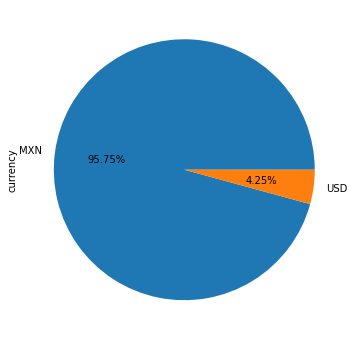

In [48]:
plt.figure(figsize=(8,6))
df.groupby('currency').size().plot(kind='pie', ylabel='currency', autopct='%.2f%%')

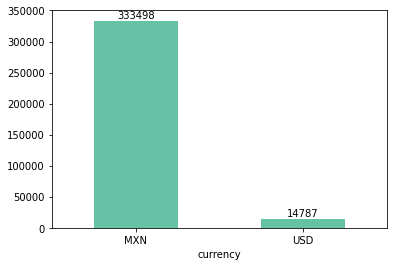

In [49]:
ax = df.groupby('currency').size().plot(kind='bar', colormap='Set2', rot=0)
ax.bar_label(ax.containers[0])
plt.show() 

* As it is clear, the vast majority of the properties are placed for rent in MXN currency. 

#### <p style=color:yellow>5. Title </p>

In [50]:
print(f'describe:\n{df.title.describe()}')
print(f'\nvalue counter:\n{df.title.value_counts()}')

describe:
count                         362517
unique                         63825
top       Local - Comercial en Renta
freq                            2059
Name: title, dtype: object

value counter:
Local - Comercial en Renta                                       2059
Departamento en Renta en Polanco Chapultepec                     1414
Local en Renta en Centro                                         1326
Local en Renta en Torreon Centro                                 1113
Casa renta                                                        938
                                                                 ... 
DEPARTAMENTO EN TORRES DEL MAYAN DE TRES RECAMARAS, BUEN PISO       1
Uxmal                                                               1
Departamento en Playa Diamante                                      1
EXCLUSIVO DEPARTAMENTO EN RENTA SOBRE PLAYA DIAMANTE                1
Casa en Renta en Heroes Ecatepec 5ta Secc                           1
Name: title, Length: 63825, d

* This feature has no missing value. 
* More than 63000 unique titles exist in the dataset. 


In [51]:
titles = pd.DataFrame(df.title.value_counts())
titles_the_most = titles[:13]
titles_the_most

,title
Local - Comercial en Renta,2059
Departamento en Renta en Polanco Chapultepec,1414
Local en Renta en Centro,1326
Local en Renta en Torreon Centro,1113
Casa renta,938
Casa en Renta en * LOMAS DE ANGELÓPOLIS *,881
Departamento renta,872
Casa en Renta en Geo Villas Colorines,695
Departamento en Renta en Lomas de Chapultepec,657
Casa en Renta en Geo Villas del Seminario,582


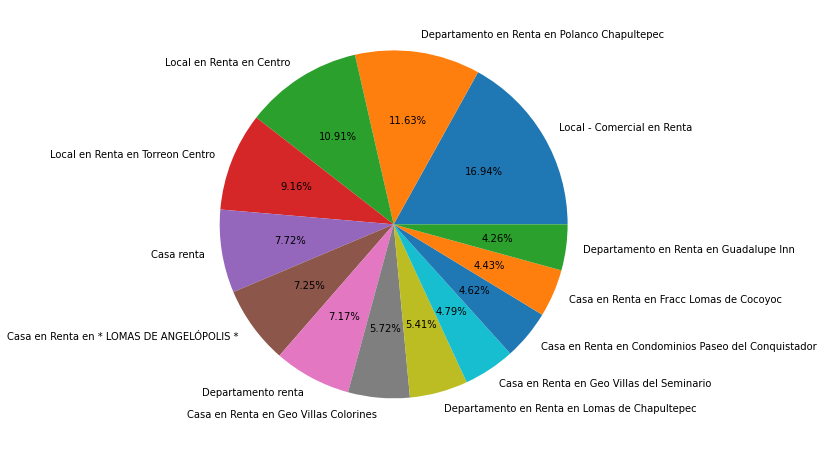

In [52]:
plt.figure(figsize=(16,8))
plt.pie(titles_the_most.title, labels=titles_the_most.index, autopct='%.2f%%')
plt.show()

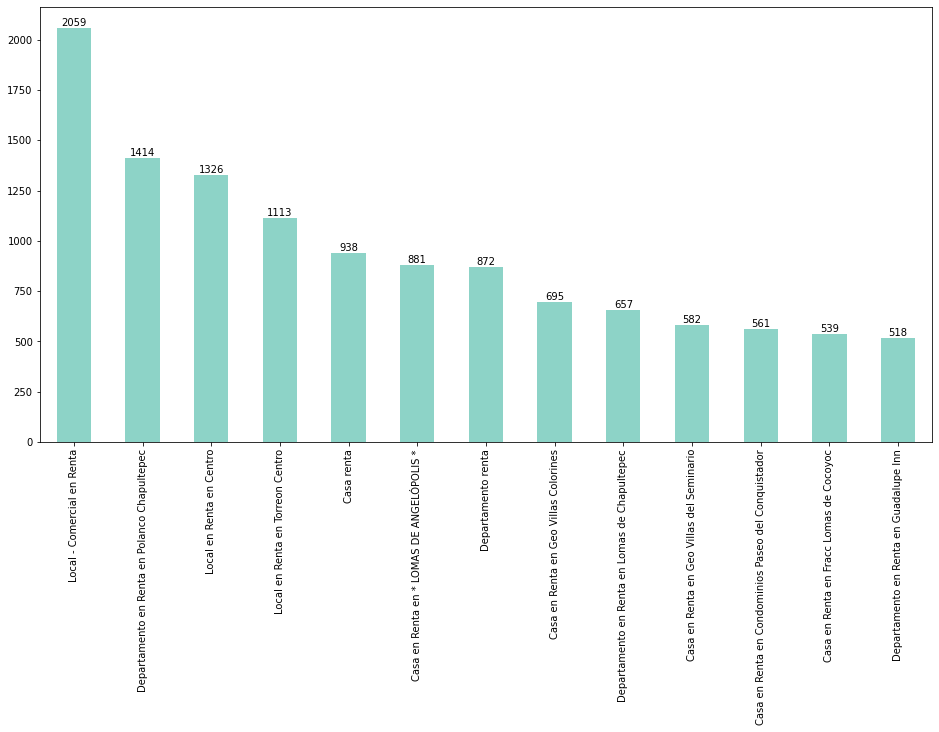

In [53]:
plt.figure(figsize=(16,8))
ax = titles_the_most.title.plot(kind='bar', colormap='Set3')
ax.bar_label(ax.containers[0])
plt.show()

* These are just the top 13 items in the title column.
* As there are huge number of titles existed in the dataset, i just showed some of most frequent ones as above visualizations. 

### <b style=color:red>B. Quantitative Variables </b>

'price_usd_per_m2', 'price_aprox_usd', 'price', 'lat', 'surface_total_in_m2', 'price_per_m2', 'lon', 'rooms', 'price_aprox_local_currency', 'expenses'

In [54]:
df._get_numeric_data()

,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses
0,20.068350,-98.793564,12000.0,12006.10,665.14,236.0,2.818390,50.847458,NaN,NaN
1,20.068350,-98.793564,18000.0,18009.16,997.71,250.0,3.990840,72.000000,NaN,NaN
2,20.108408,-98.789429,8000.0,8003.95,443.42,120.0,3.695167,57.142857,NaN,NaN
3,20.108408,-98.789429,10000.0,9661.16,535.23,0.0,NaN,NaN,NaN,NaN
4,20.108408,-98.789429,15000.0,15007.54,831.42,100.0,8.314200,150.075400,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
362518,19.503453,-99.243561,220000.0,219150.10,11137.77,560.0,19.888875,391.339464,NaN,NaN
362519,20.696918,-103.386887,220000.0,219150.10,11137.77,1100.0,10.125245,200.000000,NaN,NaN
362520,19.148433,-96.106983,220000.0,219150.10,11137.77,1224.0,9.099485,179.044199,NaN,NaN
362521,25.674639,-100.311898,220000.0,219150.10,11137.77,732.0,15.215533,91.666667,NaN,NaN


#### <p style=color:yellow>1. price </p>
* I will just skip the 'price_local_currency_aprox' as it is very close to the price feature. 

In [55]:
df.price.describe()

count    3.483680e+05
mean     2.186028e+04
std      5.047541e+04
min      0.000000e+00
25%      7.500000e+03
50%      1.350000e+04
75%      2.400000e+04
max      1.890000e+06
Name: price, dtype: float64

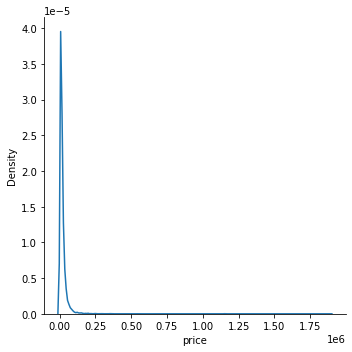

In [56]:
sns.displot(data=df, x='price', kind='kde')

C:\Users\Lenovo\Envs\applied_statistics\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

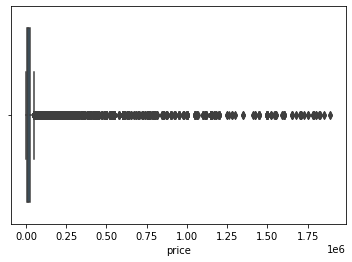

In [57]:
sns.boxplot(df['price'])

* As it is shown by boxplot, 25% of the price feature values are outlier. 
* But they can not be disregarded. 

#### <p style=color:yellow>2. Price aprox usd</p>

In [58]:
df.price_aprox_usd.describe()

count    348368.000000
mean       1359.700787
std        3110.803670
min           0.000000
25%         437.880000
50%         782.350000
75%        1385.700000
max       99771.080000
Name: price_aprox_usd, dtype: float64

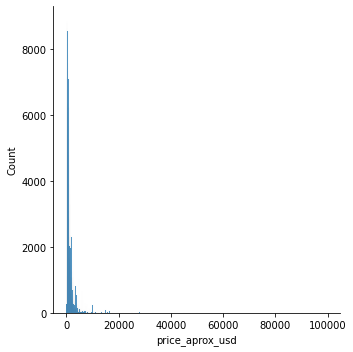

In [59]:
sns.displot(data=df, x='price_aprox_usd', kind='hist')

C:\Users\Lenovo\Envs\applied_statistics\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_aprox_usd'>

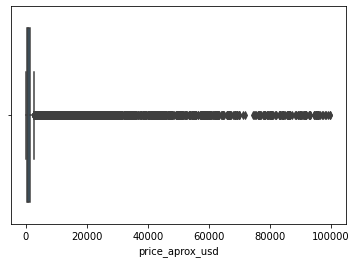

In [60]:
sns.boxplot(df['price_aprox_usd'])

* The same thing happens for the usd prices. 

#### <p style=color:yellow>3. Surface total in m2</p>

In [61]:
df.surface_total_in_m2.describe()

count    3.570250e+05
mean     3.103443e+04
std      5.181800e+06
min      0.000000e+00
25%      6.100000e+01
50%      1.200000e+02
75%      2.250000e+02
max      1.233446e+09
Name: surface_total_in_m2, dtype: float64

C:\Users\Lenovo\Envs\applied_statistics\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='surface_total_in_m2'>

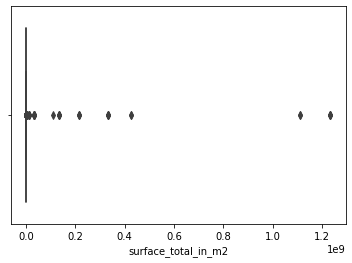

In [62]:
sns.boxplot(df['surface_total_in_m2'])

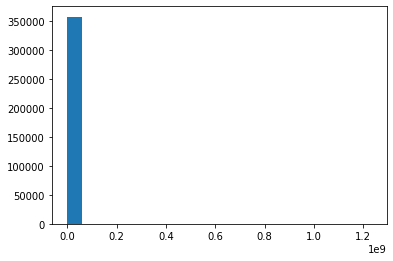

In [63]:
plt.hist(x=df.surface_total_in_m2, bins=20)
plt.show()

* It is not clear that how the surface distributed, and that is because of the number of outliers and their huge values. 
* I will plot the distribution between zero and third quantile of the data. 

In [64]:
upper_bound = df.surface_total_in_m2.quantile(0.75) 
df[df.surface_total_in_m2 <= upper_bound].shape

(268001, 16)

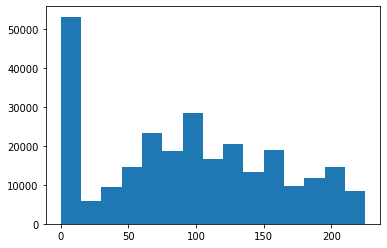

In [65]:
plt.hist(x=df[df.surface_total_in_m2 <= upper_bound]['surface_total_in_m2'], bins=15)
plt.show()

* So there we can see that the distribution of data within three quantile is semi-normal, with a few skew to the right. 
* And we can guess the mean of this part of data is almost 100 square meters. 

#### <p style=color:yellow>4. Price usd per m2</p>

In [66]:
df.price_usd_per_m2.describe()

count    300246.000000
mean         11.408851
std          82.732788
min           0.000000
25%           3.325700
50%           5.215667
75%           8.920159
max        7314.540000
Name: price_usd_per_m2, dtype: float64

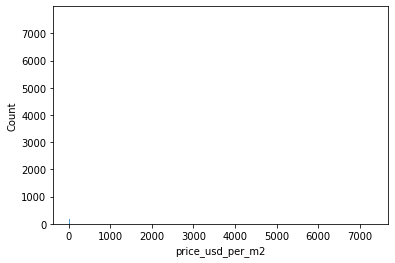

In [67]:
sns.histplot(data=df, x='price_usd_per_m2')
plt.show()

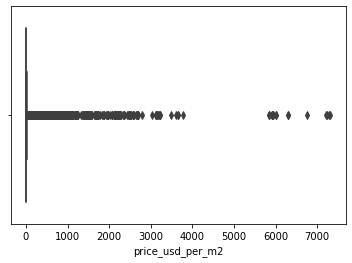

In [68]:
sns.boxplot(data=df, x='price_usd_per_m2')
plt.show()

* Here also we can not say anything as the high amount of outliers, namely, those of higher than the third quantile. 
* I will do the same thing as in previous variable. 

<AxesSubplot:xlabel='price_usd_per_m2'>

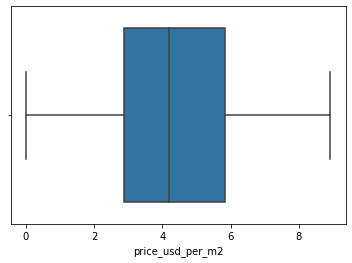

In [69]:
q3 = df.price_usd_per_m2.quantile(0.75)
sns.boxplot(data=df[df.price_usd_per_m2<=q3], x='price_usd_per_m2')

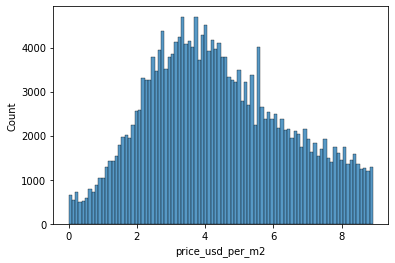

In [70]:
sns.histplot(data=df[df.price_usd_per_m2<=q3], x='price_usd_per_m2')
plt.show()

* This graph also has some right skewness.
* Now it is more reasonable to consider the data within the min and third quartile. 

#### <p style=color:yellow> 5. Price per m2 (for local currency)

In [71]:
df.price_per_m2.describe()

count    300210.000000
mean        210.764880
std        1617.011102
min           0.000004
25%          60.000000
50%          92.000000
75%         156.250000
max      130000.000000
Name: price_per_m2, dtype: float64

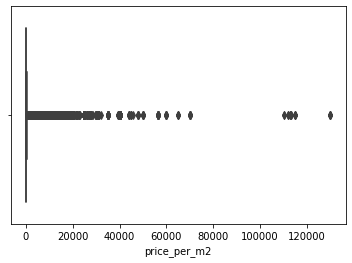

In [72]:
sns.boxplot(data=df, x='price_per_m2')
plt.show()

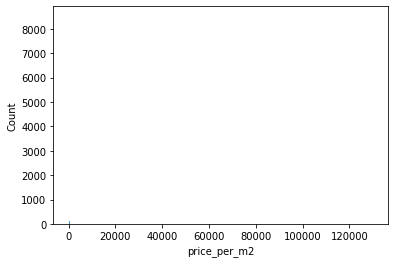

In [73]:
sns.histplot(data=df, x='price_per_m2')
plt.show()

* As it was expected, like the other prices. 

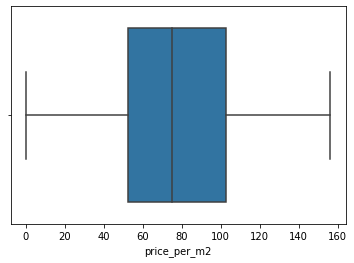

In [74]:
q3 = df.price_per_m2.quantile(0.75)
sns.boxplot(data=df[df.price_per_m2<=q3], x='price_per_m2')
plt.show()

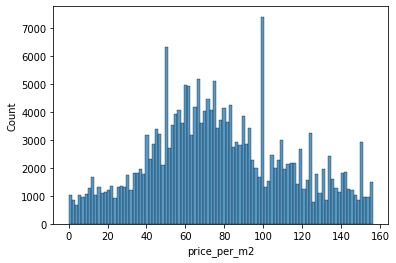

In [75]:
sns.histplot(data=df[df.price_per_m2<=q3], x='price_per_m2')
plt.show()

* This graph looks more like a normal one comparing to the others. 

#### <p style=color:yellow>6. Rooms </p>

In [76]:
df.rooms.describe()

count    12795.000000
mean         2.631419
std          1.059131
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         12.000000
Name: rooms, dtype: float64

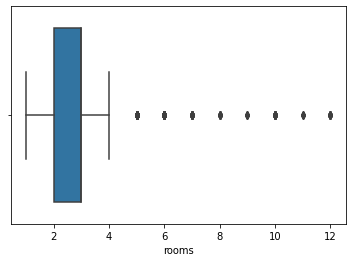

In [77]:
sns.boxplot(data=df, x='rooms')
plt.show()

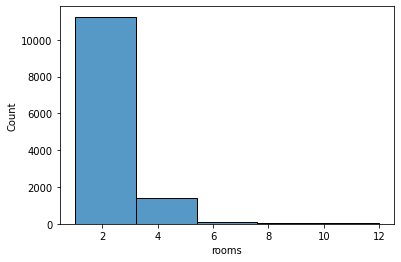

In [78]:
sns.histplot(data=df, x='rooms', bins=5)
plt.show()

* First of all!! This feature has 96% Null value. So the presented results are for only 4% of the remaining data. 
* Since values of this feature are in natural number type, I can talk on the graphs. 
* As it is showed, 75% of the data are having 4 rooms at most. 
* 50% of the properties (out of the 4%) have 2 or 3 rooms. 

In [79]:
df['rooms'].unique()

array([nan,  2.,  3., 12.,  5.,  4.,  1.,  6.,  7.,  9.,  8., 10., 11.])

#### <p style=color:yellow>7. Expenses </p>

In [80]:
df.expenses.describe()

count     3578.000000
mean      2449.128563
std       4802.988616
min          1.000000
25%        300.000000
50%       1000.000000
75%       3000.000000
max      70000.000000
Name: expenses, dtype: float64

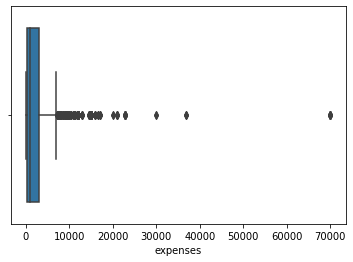

In [81]:
sns.boxplot(data=df, x='expenses')
plt.show()

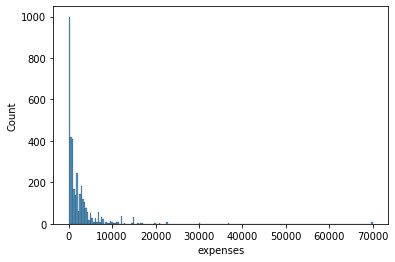

In [82]:
sns.histplot(data=df, x='expenses')
plt.show()

* Just out of curiosity, I want to see the distribution of this column without the outliers. 

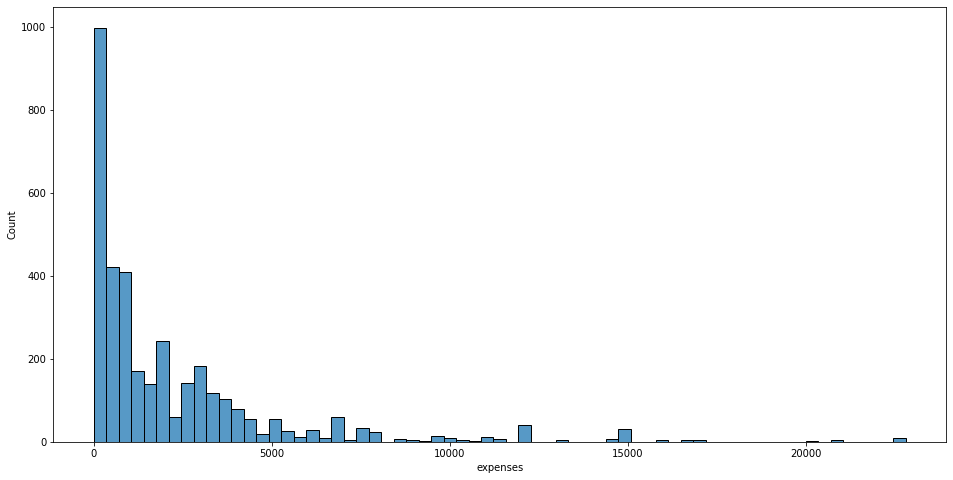

In [83]:
plt.figure(figsize=(16,8))
sns.histplot(data=df[df.expenses<25000], x='expenses')
plt.show()

* This column has values less than 1% of the whole dataset. 
* The distribution, as it it showed in the graphs, is right skewed. 
* 50% of the data have expenses between 300 and 3000. 

## II. Second, time to Exploratory Data Analysis (EDA) and Examine Relationships. 

<table>
  <tr>
    <th>Categorical Variables</th>
    <th>Quantitative Variables</th>
  </tr>
  <tr>
    <td>created_on</td>
    <td>lat</td>
  </tr>
  <tr>
    <td>property_type</td>
    <td>lon</td>
  </tr>
  <tr>
    <td>place_name</td>
    <td>price_aprox_local_currency (or price)</td>
  </tr>
  <tr>
    <td>state_name</td>
    <td>price_aprox_usd (or price)</td>
  </tr>
  <tr>
    <td>currency</td>
    <td>surface_total_in_m2</td>
  </tr>
  <tr>
    <td>title</td>
    <td>price_usd_per_m2</td>
  </tr>
  <tr>
    <td>year_n_season (<u style=color:green>to be added</u>)</td>
    <td>price_per_m2</td>
  </tr>
  <tr>
    <td>--</td>
    <td>rooms</td>
  </tr>
  <tr>
    <td>--</td>
    <td>expenses</td>
  </tr>
  
</table>

### <p style=color:yellow>A. Categorical - Quantitative (C->Q) relationships</p>

* First I need to change the format of 'created_on' column to a datetime format. 

In [84]:
df.created_on = df.created_on.astype('datetime64[ns]')

In [85]:
df.created_on

0        2017-02-10
1        2017-02-02
2        2017-02-18
3        2017-02-27
4        2017-01-14
            ...    
362518   2017-09-28
362519   2017-08-04
362520   2017-11-10
362521   2017-09-21
362522   2017-12-09
Name: created_on, Length: 362517, dtype: datetime64[ns]

In [86]:
# Since I have deleted some of the rows, theirs index does not exist, 
# so in the further steps it can cause some problems. 
# Therefore I have to reset the indexes from zero. 

df = df.reset_index(drop=True)

In [87]:
# I will create three lists, for years, months, and seasons, based of the 'created_on' column. 
# Then I will create a new column of these columns and call it 'year_n_season'
# This way I will have less categories, and more comprehensive. 

years, months = [], []
for i in range(len(df.created_on)):
    years.append(df.created_on[i].date().year)
    months.append(df.created_on[i].date().month)


season = []
for j in range(len(months)):
    if months[j] < 4:
        season.append('Q1')
    elif months[j] < 7:
        season.append('Q2')
    elif months[j] < 10:
        season.append('Q3')
    else:
        season.append('Q4')


df['year_n_season'] = pd.Series(list(zip(years, season)))

In [88]:
df.head()

,created_on,property_type,place_name,state_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses,title,year_n_season
0,2017-02-10,house,Hidalgo,Hidalgo,20.068350,-98.793564,12000.0,MXN,12006.10,665.14,236.0,2.818390,50.847458,NaN,NaN,Casa - Hangares Pachuca Hidalgo,"(2017, Q1)"
1,2017-02-02,house,Hidalgo,Hidalgo,20.068350,-98.793564,18000.0,MXN,18009.16,997.71,250.0,3.990840,72.000000,NaN,NaN,RENTO CASA EN PRIVADA EXCLUSIVA,"(2017, Q1)"
2,2017-02-18,house,Hidalgo,Hidalgo,20.108408,-98.789429,8000.0,MXN,8003.95,443.42,120.0,3.695167,57.142857,NaN,NaN,EXCELENTE CASA RESIDENCIAL EN RENTA,"(2017, Q1)"
3,2017-02-27,house,Hidalgo,Hidalgo,20.108408,-98.789429,10000.0,MXN,9661.16,535.23,0.0,NaN,NaN,NaN,NaN,RENTO CASA EN RINCÓN DE LA PLATA,"(2017, Q1)"
4,2017-01-14,apartment,Hidalgo,Hidalgo,20.108408,-98.789429,15000.0,MXN,15007.54,831.42,100.0,8.314200,150.075400,NaN,NaN,"DEPARTAMENTO AMUEBLADO, ZONA PLATEADA, PACHUCA","(2017, Q1)"


##### <b style=color:#990099>1. Starting with year_n_season column as a categorical explanatory, and local price as a response variables. </b>

* As a rule of thumb, I will dimonstrate a box plot so that the distribution of the price among different seasons get clear. 

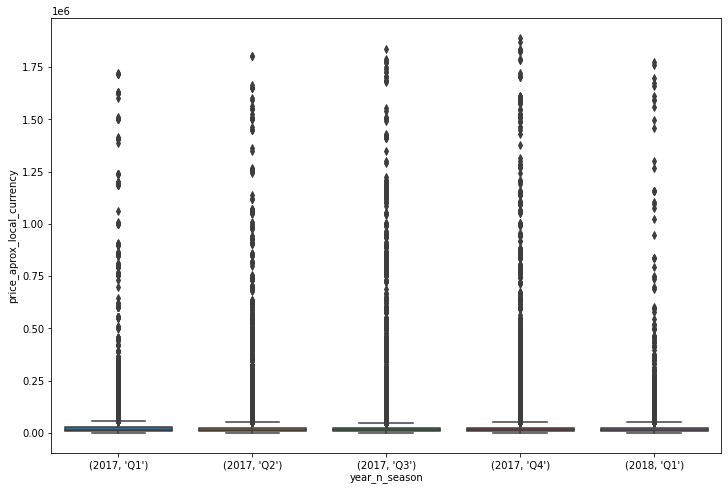

In [89]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='year_n_season', y='price_aprox_local_currency')
plt.show()

* As there are huge number of data, 75% of that lies within a distance near to zero. 
* But the rest of 25% of data, I think hase something to say. 

* Now I will create a new table from the datafram, and just derive the year_n_season and price for local currency. Then I will do the same with the price for USD. 

In [90]:
df[['year_n_season', 'price_aprox_local_currency']].groupby('year_n_season').sum()

,price_aprox_local_currency
year_n_season,
"(2017, Q1)",1.743029e+09
"(2017, Q2)",2.156079e+09
"(2017, Q3)",2.062975e+09
"(2017, Q4)",2.258677e+09
"(2018, Q1)",5.415655e+08


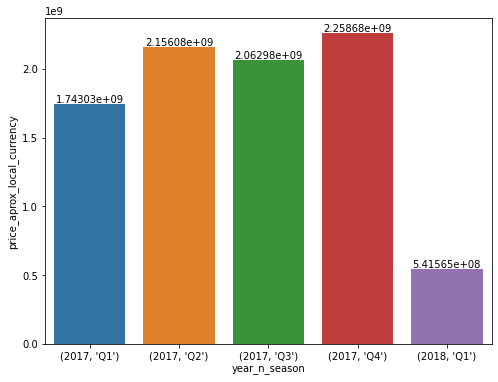

In [91]:
x = df[['year_n_season', 'price_aprox_local_currency']].groupby('year_n_season').sum().reset_index()
plt.figure(figsize=(8,6))
ax = sns.barplot(x=x.year_n_season, y=x.price_aprox_local_currency)
ax.bar_label(ax.containers[0])
plt.show()

* This graph shows how the sum of price_in_local_currency's trend through the seasons. 
* Since there are data cration date on to the end of first month of 2018, we can simply assume that at the end of first quarter of 2018, the total price in local currency would be 1.62 bilion (1.62 e+09). 
* I can say as the time passes, season by season, the amount of renting houses goes higher. In winter (last quarter), there is the highest amount of renting. 

In [92]:
df[['year_n_season', 'price_aprox_usd']].groupby('year_n_season').sum()

,price_aprox_usd
year_n_season,
"(2017, Q1)",9.659331e+07
"(2017, Q2)",1.187872e+08
"(2017, Q3)",1.104412e+08
"(2017, Q4)",1.187274e+08
"(2018, Q1)",2.912711e+07


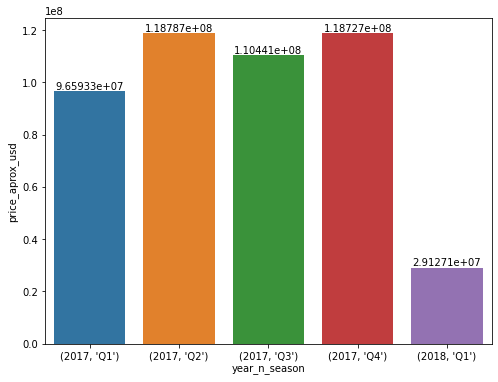

In [93]:
x = df[['year_n_season', 'price_aprox_usd']].groupby('year_n_season').sum().reset_index()
plt.figure(figsize=(8,6))
ax = sns.barplot(x=x.year_n_season, y=x.price_aprox_usd)
ax.bar_label(ax.containers[0])
plt.show()

* There is the same pattern in rental properties with USD currency like the local ones.  

##### <b style=color:#990099>2. Now I will investigate the relationship between property type and price. </b>

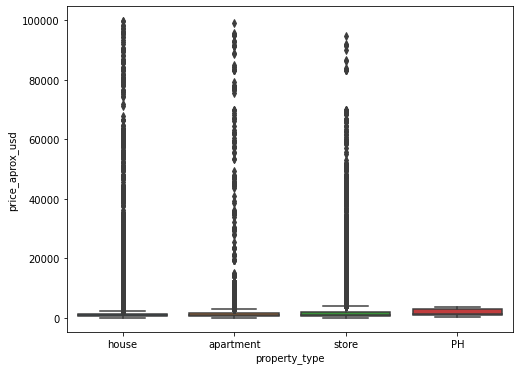

In [94]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='property_type', y='price_aprox_usd')
plt.show()

* I think I can devide the data into two parts, the ones that their prices are in range of zero and third quantile, and the rest ones. 

In [200]:
q3 = df.price_aprox_usd.quantile(0.75)
q1 = df.price_aprox_usd.quantile(0.25)
uper_bound = q3 + 1.5 * (q3 - q1)
df_part1 = df[df.price_aprox_usd<=uper_bound]
df_part2 = df[df.price_aprox_usd>uper_bound] 

print(len(df_part1), len(df_part2))

319366 29002


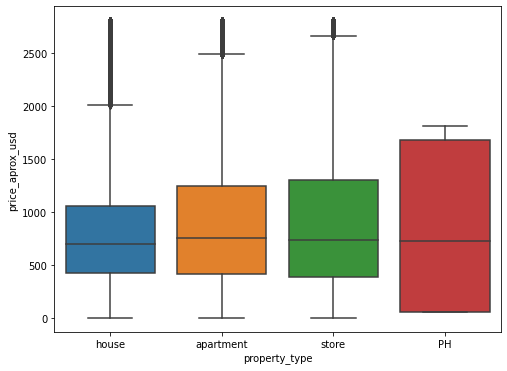

In [201]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_part1, x='property_type', y='price_aprox_usd')
plt.show()

* The result of the prices of PH properties is not reliable as only 32 of that in data are available. 
* Store properties has more diverse range of prices compared to apartment and house ones. 

##### <b style=color:#990099>3. Now let's check the property type against price per m2. </b>

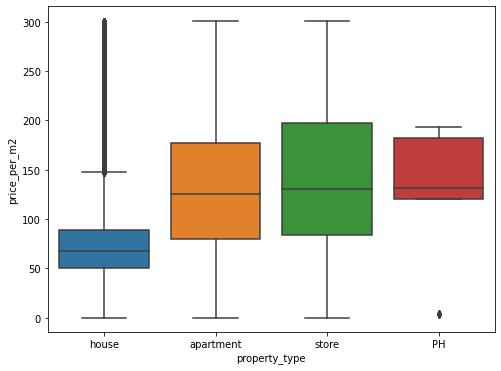

In [230]:
q3 = df.price_per_m2.quantile(0.75)
q1 = df.price_per_m2.quantile(0.25)
uper_bound = q3 + 1.5 * (q3 - q1)
plt.figure(figsize=(8,6))
sns.boxplot(data=df[df.price_per_m2<uper_bound], x='property_type', y='price_per_m2')
plt.show() 

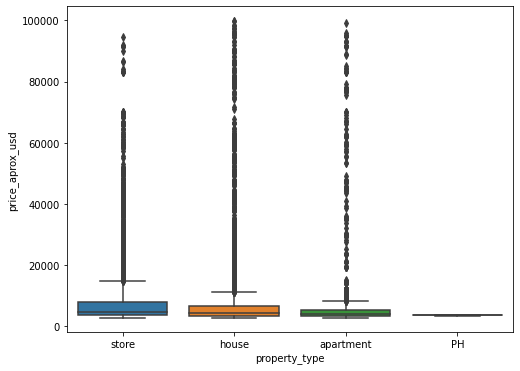

In [202]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_part2, x='property_type', y='price_aprox_usd')
plt.show()

* So even deviding the dataset into two parts is showing that the first half is more discussable than the second half. 
* Just for making sure that the same thing happens for other kind of price, the local one. 

<AxesSubplot:xlabel='year_n_season', ylabel='price_aprox_local_currency'>

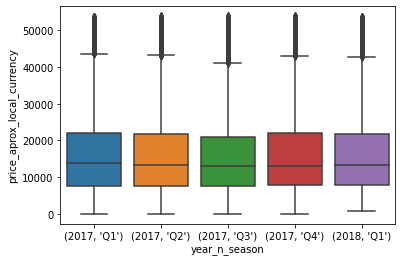

In [199]:
q3_local = df.price_aprox_local_currency.quantile(0.75)
q1_local = df.price_aprox_local_currency.quantile(0.25)
uper_bound = q3 + 1.5 * (q3_local - q1_local)
df_part1_local = df[df.price_aprox_local_currency<uper_bound]
sns.boxplot(data=df_part1_local, x='year_n_season', y='price_aprox_local_currency')


* So far so good, the local currency has a normal habbit when it comes to the first thress quantiles of data. 

##### <b style=color:#990099>4. Now I want to see which kind of most frequent topics had the most price on them. </b>

In [102]:
titles = pd.DataFrame(df.title.value_counts()).reset_index().head(15)
titles[:5]

,index,title
0,Local - Comercial en Renta,2059
1,Departamento en Renta en Polanco Chapultepec,1414
2,Local en Renta en Centro,1326
3,Local en Renta en Torreon Centro,1113
4,Casa renta,938


In [103]:
titles = titles[:5]

In [121]:
df_titles = df[df.title.isin(titles['index'])]
df_titles.head()

,created_on,property_type,place_name,state_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses,title,year_n_season
489,2017-01-31,house,Puebla,Puebla,19.025246,-98.217836,2500.0,MXN,2411.36,133.59,250.0,0.534360,6.410256,12.0,NaN,Casa renta,"(2017, Q1)"
498,2017-02-15,house,Puebla,Puebla,19.041289,-98.206201,40000.0,MXN,38584.20,2137.57,900.0,2.375078,88.888889,3.0,NaN,Casa renta,"(2017, Q1)"
1355,2017-02-17,store,Mazatlán,Sinaloa,23.205118,-106.419975,120000.0,MXN,120061.09,6651.40,1990.0,3.342412,60.301508,NaN,NaN,Local en Renta en Centro,"(2017, Q1)"
1774,2017-02-15,house,Huamantla,Tlaxcala,19.309487,-97.912858,3500.0,MXN,3375.98,187.03,70.0,2.671857,50.000000,2.0,NaN,Casa renta,"(2017, Q1)"
2421,2017-02-16,store,Querétaro,Querétaro,20.612290,-100.424420,14000.0,MXN,14007.00,775.99,150.0,5.173267,93.333333,NaN,NaN,Local en Renta en Centro,"(2017, Q1)"


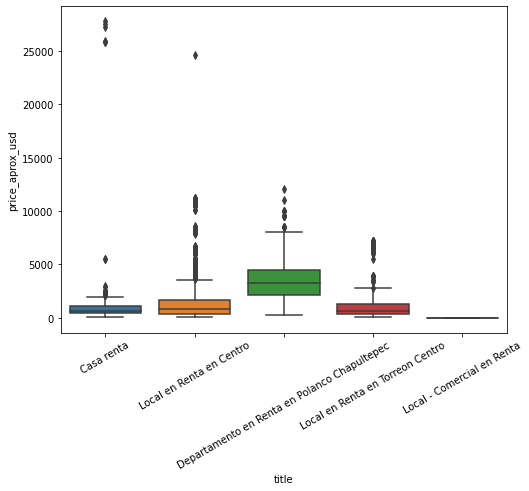

In [231]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_titles, x='title', y='price_aprox_usd')
plt.xticks(rotation=30)
plt.show()

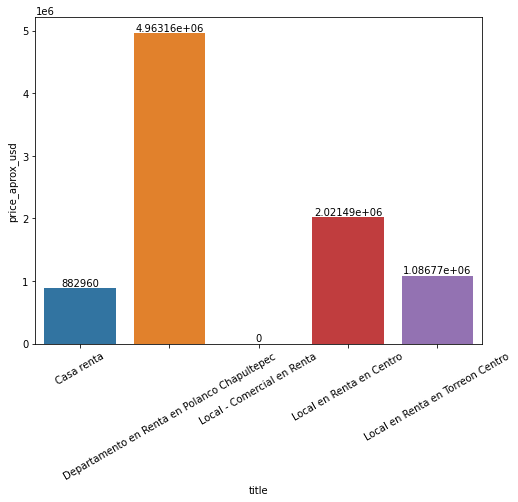

In [232]:
x = df_titles[['title', 'price_aprox_usd']].groupby('title').sum().reset_index()
plt.figure(figsize=(8,6))
ax = sns.barplot(x=x.title, y=x.price_aprox_usd)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=30)
plt.show()

* <b style=color:red>It is amazing. The title which has the most frequency in the data, has zero sum of price in usd. </b>
* Let's check it for local currency. 

##### <b style=color:#990099>5. title vs price as in local currency. </b>

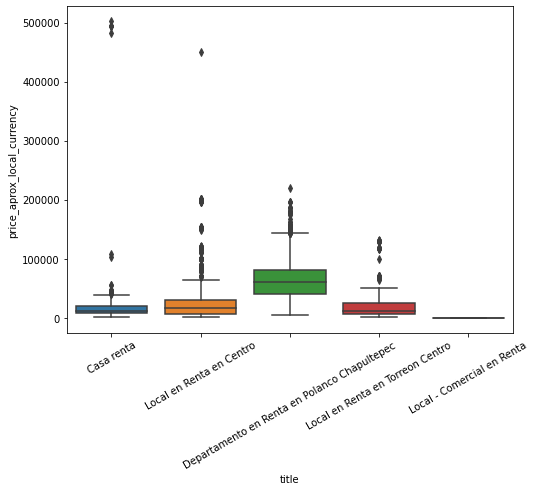

In [234]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_titles, x='title', y='price_aprox_local_currency')
plt.xticks(rotation=30)
plt.show()

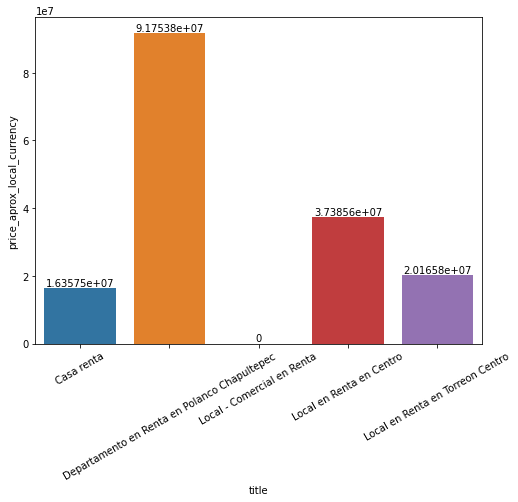

In [236]:
x = df_titles[['title', 'price_aprox_local_currency']].groupby('title').sum().reset_index()
plt.figure(figsize=(8,6))
ax = sns.barplot(x=x.title, y=x.price_aprox_local_currency)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=30)
plt.show()

* It is the same for local price. It is considerable.
* I will check why is that so. 

In [136]:
df_titles[df_titles.title=='Local - Comercial en Renta'].head()

,created_on,property_type,place_name,state_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses,title,year_n_season
36539,2017-05-29,store,Tampico,Tamaulipas,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,Local - Comercial en Renta,"(2017, Q2)"
36543,2017-05-29,store,Coahuila,Veracruz de Ignacio de la Llave,NaN,NaN,NaN,NaN,NaN,NaN,300.0,NaN,NaN,NaN,NaN,Local - Comercial en Renta,"(2017, Q2)"
36552,2017-05-29,store,Michoacán,Chiapas,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Local - Comercial en Renta,"(2017, Q2)"
36553,2017-05-29,store,Michoacán,Chiapas,NaN,NaN,NaN,NaN,NaN,NaN,384.0,NaN,NaN,NaN,NaN,Local - Comercial en Renta,"(2017, Q2)"
36556,2017-05-29,store,Coahuila,Veracruz de Ignacio de la Llave,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,Local - Comercial en Renta,"(2017, Q2)"


* So the reason is that this dataframe includes NaN values for almost all of the quantitative variables that have the title of `'Local - Comercial en Renta'`.

##### <b style=color:#990099>6. Let's check if there is any relation between title and surface in square meter. </b>

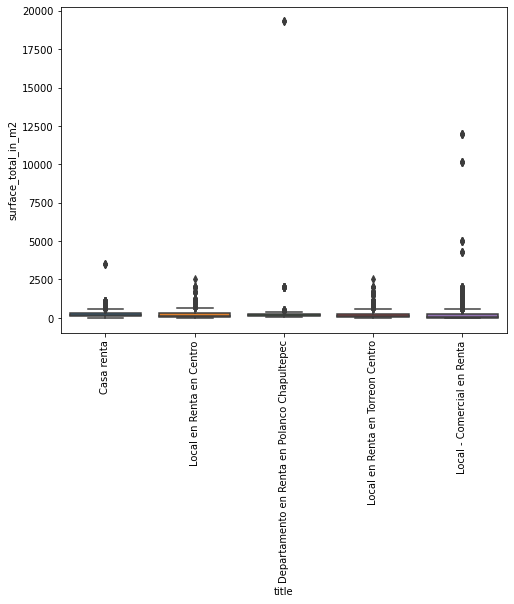

In [245]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_titles, x='title', y='surface_total_in_m2')
plt.xticks(rotation=90)
plt.show()

* Once again the outnumbered outliers don't let me visualize any thing here. 
* By the way, it is not very normal for all the people to have a rental property for 20,000 or 12,500 or even 5,000 square meters. 
* I will search for those houses with lower than 750 square meters surface, which looks more affordable to the vast majority of people. 
* <b style=color:orange>BUT I WILL KEEP IN MIND TO GIVE A CERTAIN SEARCH FOR THOSE PROPERTIES WITH ABNORMAL AREA (MORE THAN 1000 SQUARE METERS)</b>

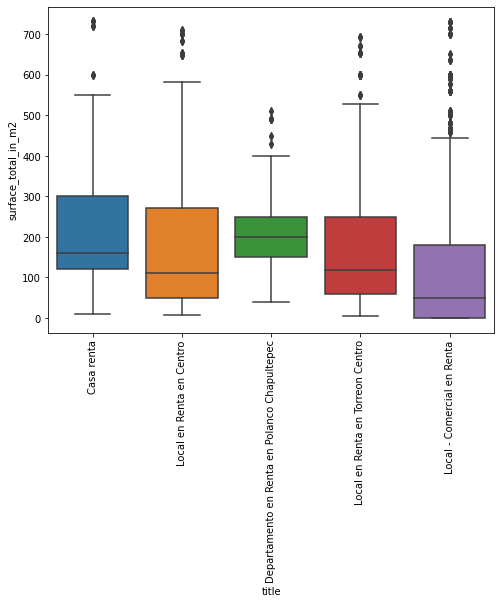

In [246]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_titles[df_titles.surface_total_in_m2<750], x='title', y='surface_total_in_m2')
plt.xticks(rotation=90)
plt.show()

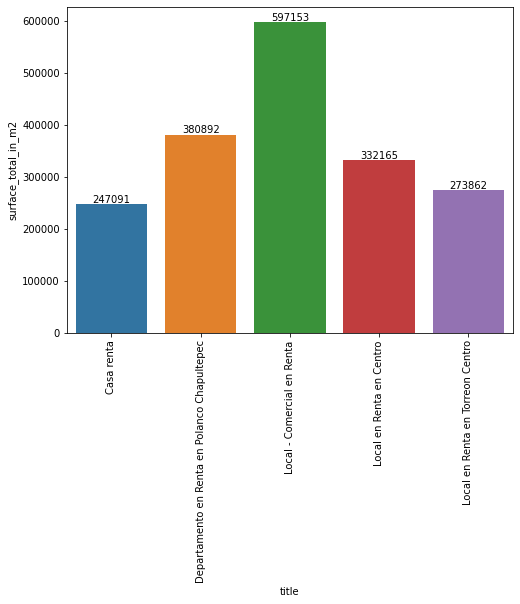

In [247]:
x = df_titles[['title', 'surface_total_in_m2']].groupby('title').sum().reset_index()
plt.figure(figsize=(8,6))
ax = sns.barplot(x=x.title, y=x.surface_total_in_m2)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

* Now the order of sum of surface in m2, is the same as the order of most frequent titles. Maybe there is a correlation!
* <b style=color:orange>SHOULD BE CHECKED FURTHER!</b>

##### <b style=color:#990099>7. Time to check if there is any relation between currency and surface in m2.</b>

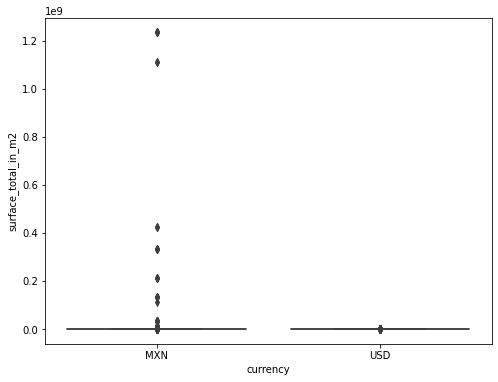

In [198]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='currency', y='surface_total_in_m2')
plt.show()

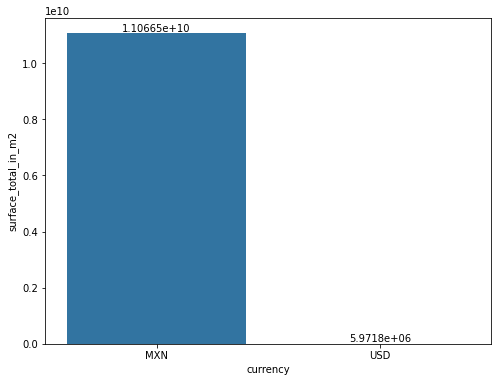

In [197]:
x = df[['currency', 'surface_total_in_m2']].groupby('currency').sum().reset_index()
plt.figure(figsize=(8,6))
ax = sns.barplot(data=x, x='currency', y='surface_total_in_m2')
ax.bar_label(ax.containers[0])
plt.show()

* These graph show that almost all of the properties tend to be proposed in MXN currency, except few of them. 
* No other information that is important. 

##### <b style=color:#990099> 8. Let's check the relation between place name and prices. </b>

In [157]:
places = pd.DataFrame(df.place_name.value_counts()).reset_index()[:5]
places

,index,place_name
0,Distrito Federal,33992
1,Veracruz,22184
2,Querétaro,20522
3,Mérida,17429
4,Coahuila,11947


In [160]:
df_places = df[df.place_name.isin(places['index'])]
df_places.head()

,created_on,property_type,place_name,state_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses,title,year_n_season
272,2017-01-30,apartment,Querétaro,Querétaro,NaN,NaN,14000.0,MXN,13504.48,748.15,NaN,NaN,NaN,NaN,NaN,Departamento en Renta Sierra Azul,"(2017, Q1)"
943,2017-02-09,apartment,Mérida,Yucatán,NaN,NaN,5000.0,MXN,5002.51,277.14,0.0,NaN,NaN,NaN,NaN,DEPARTAMENTO UBICADO EN MONTECRISTO,"(2017, Q1)"
944,2017-01-20,apartment,Mérida,Yucatán,NaN,NaN,4500.0,MXN,4502.15,249.42,0.0,NaN,NaN,NaN,NaN,Departamto ESTUDIO en RENTA en Col. Diaz Orda...,"(2017, Q1)"
945,2017-01-05,house,Mérida,Yucatán,NaN,NaN,10000.0,MXN,9661.16,535.23,163.0,3.28362,75.757576,NaN,NaN,Casa en renta Xcumpich,"(2017, Q1)"
946,2017-01-18,apartment,Mérida,Yucatán,NaN,NaN,3500.0,MXN,3501.61,193.99,0.0,NaN,NaN,NaN,NaN,ESTUDIO PARA PAREJA O ESTUDIANTES AL NORTE DE ...,"(2017, Q1)"


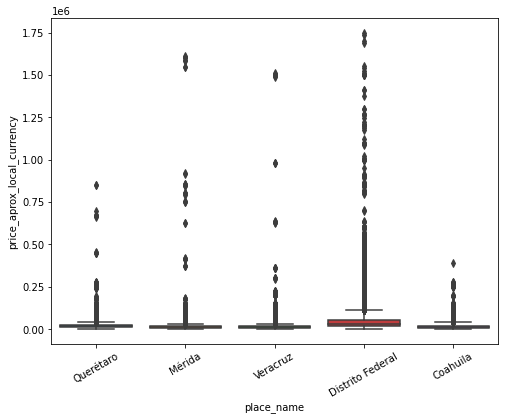

In [195]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_places, x='place_name', y='price_aprox_local_currency')
plt.xticks(rotation=30)
plt.show()

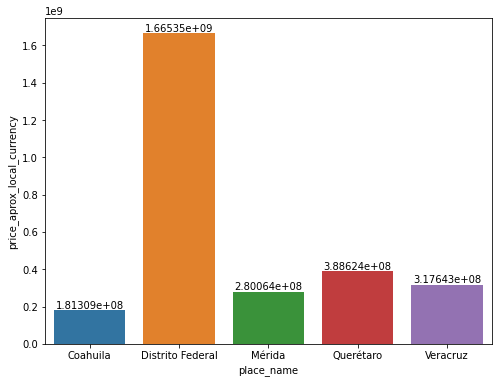

In [194]:
x = df_places[['place_name', 'price_aprox_local_currency']].groupby('place_name').sum().reset_index()
plt.figure(figsize=(8,6))
ax = sns.barplot(data=x, x='place_name', y='price_aprox_local_currency')
ax.bar_label(ax.containers[0])
plt.show()

* Distrito federal has a significant distance comparing to the other places, as a matter of local prices. 
* Just to reduce the effect of outliers, do same as before. 

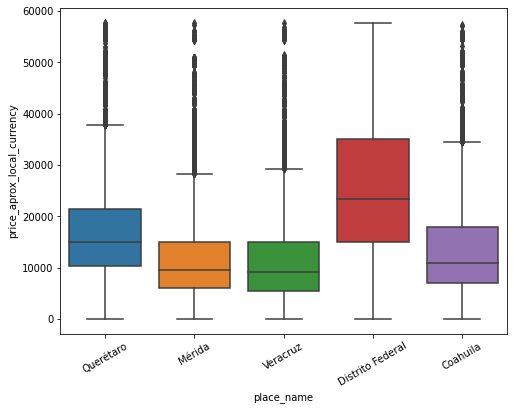

In [193]:
q3 = df_places.price_aprox_local_currency.quantile(0.75)
q1 = df_places.price_aprox_local_currency.quantile(0.25)
uper_bound = q3 + 1.5 * (q3 - q1)
plt.figure(figsize=(8,6))
sns.boxplot(data=df_places[df_places.price_aprox_local_currency<uper_bound], x='place_name', y='price_aprox_local_currency')
plt.xticks(rotation=30)
plt.show()

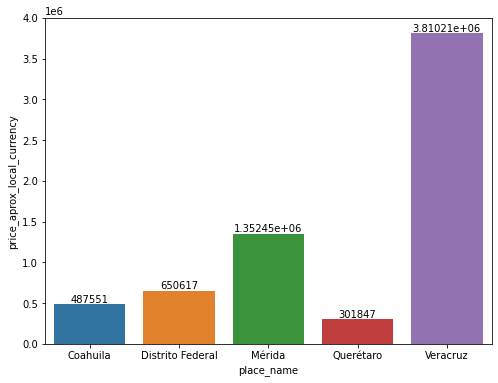

In [192]:
x = df_places[df_places.price_aprox_local_currency<uper_bound][['place_name', 'price_aprox_local_currency']].groupby('place_name').sum().reset_index()
plt.figure(figsize=(8,6))
ax = sns.barplot(data=x, x='place_name', y='price_aprox_local_currency')
ax.bar_label(ax.containers[0])
plt.show()

* Okay, Now I can say that the highest sum of price belongs to the most frequent place name, Distrito Federal. 
* However the second and the third most frequent place names (Veracruz, and Queretaro) yield the converse sum of prices. 
* Let's do the same process for usd price

##### <b style=color:#990099>9. Place name vs price in usd. </b>

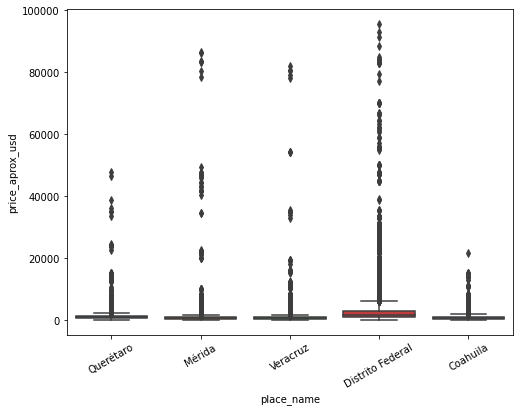

In [191]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_places, x='place_name', y='price_aprox_usd')
plt.xticks(rotation=30)
plt.show()

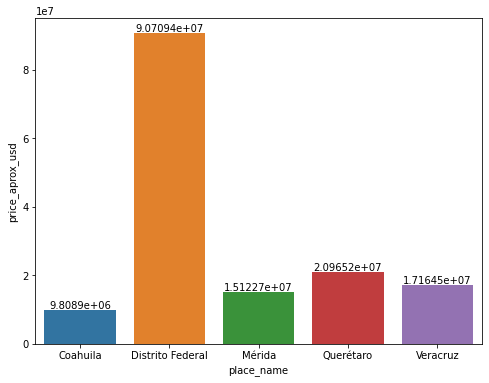

In [190]:
x = df_places[['place_name', 'price_aprox_usd']].groupby('place_name').sum().reset_index()
plt.figure(figsize=(8,6))
ax = sns.barplot(data=x, x='place_name', y='price_aprox_usd')
ax.bar_label(ax.containers[0])
plt.show()

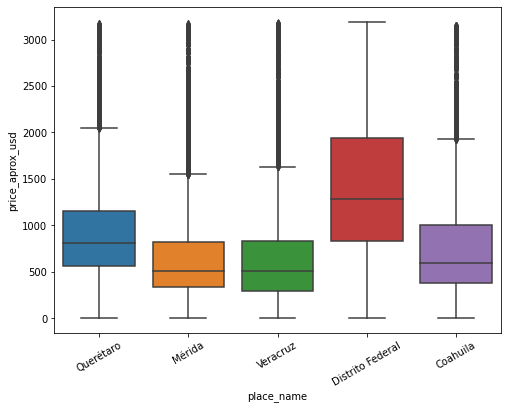

In [189]:
q3 = df_places.price_aprox_usd.quantile(0.75)
q1 = df_places.price_aprox_usd.quantile(0.25)
uper_bound = q3 + 1.5 * (q3 - q1)
plt.figure(figsize=(8,6))
sns.boxplot(data=df_places[df_places.price_aprox_usd<uper_bound], x='place_name', y='price_aprox_usd')
plt.xticks(rotation=30)
plt.show()

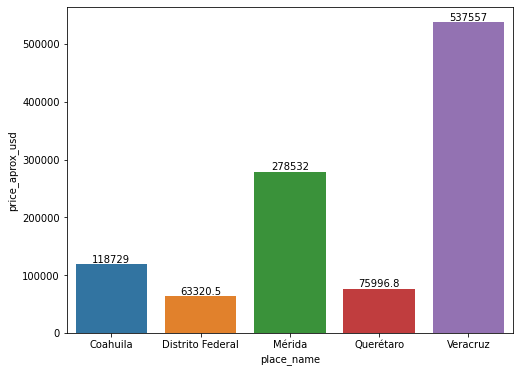

In [188]:
x = df_places[df_places.price_aprox_usd<upper_bound][['place_name', 'price_aprox_usd']].groupby('place_name').sum().reset_index()
plt.figure(figsize=(8,6))
ax = sns.barplot(data=x, x='place_name', y='price_aprox_usd')
ax.bar_label(ax.containers[0])
plt.show()

* <p style=color:orange>Unlike the local price, for which the Distro Federal has the highest sum of prices, for the sum of usd prices, Veracruz owns the highest sum of prices, with significant difference compared to the Merida. </p>

##### <b style=color:#990099>10. State name and prices relationships, this time price per square meters. </b>

In [208]:
# getting the 7 most frequent states in dataset, as all of them are above 20000 times happened. 
states = pd.DataFrame(df.state_name.value_counts()).reset_index()[:7] 
states

,index,state_name
0,Baja California,39994
1,Estado de México,39857
2,Veracruz de Ignacio de la Llave,34199
3,Querétaro,30698
4,Nuevo León,29595
5,Puebla,27329
6,Yucatán,21342


In [209]:
df_states = df[df.state_name.isin(states['index'])]
df_states.head(2)

,created_on,property_type,place_name,state_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses,title,year_n_season
272,2017-01-30,apartment,Querétaro,Querétaro,NaN,NaN,14000.0,MXN,13504.48,748.15,NaN,NaN,NaN,NaN,NaN,Departamento en Renta Sierra Azul,"(2017, Q1)"
291,2017-02-04,store,Amozoc,Puebla,19.044026,-98.054963,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,RENTA LOCALES COMERCIALES BVLD. PUEBLA- AMOZOC...,"(2017, Q1)"


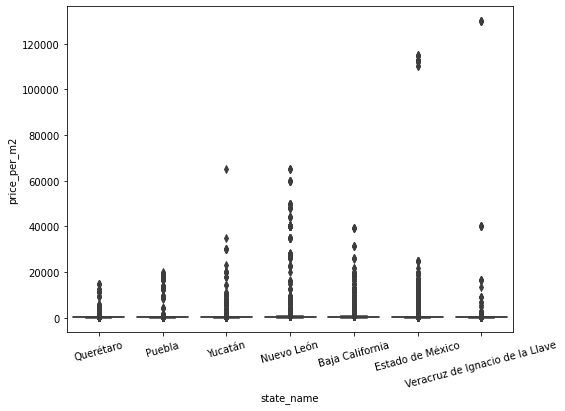

In [213]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_states, x='state_name', y='price_per_m2')
plt.xticks(rotation=15)
plt.show()

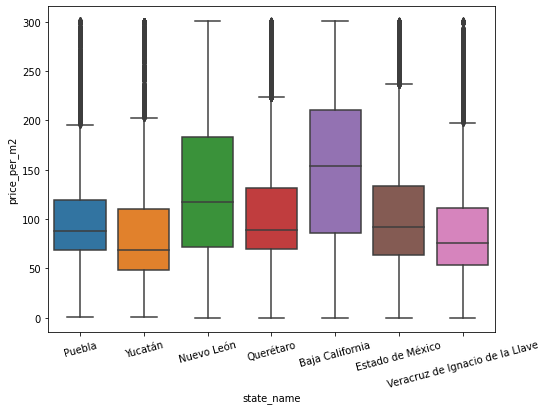

In [252]:
q3 = df.price_per_m2.quantile(0.75)
q1 = df.price_per_m2.quantile(0.25)
uper_bound = q3 + 1.5 * (q3 - q1)
plt.figure(figsize=(8,6))
sns.boxplot(data=df_states[df_states.price_per_m2<uper_bound], x='state_name', y='price_per_m2')
plt.xticks(rotation=15)
plt.show()

* So I can see that, the middle 50% of data in this column for each state, Baja California has the highest price range, compared to other states. 
* On the other hand, Puebla has the least variation among these states. 

##### <b style=color:#990099>11. state name type and sufrace in m2 relationships. </b>

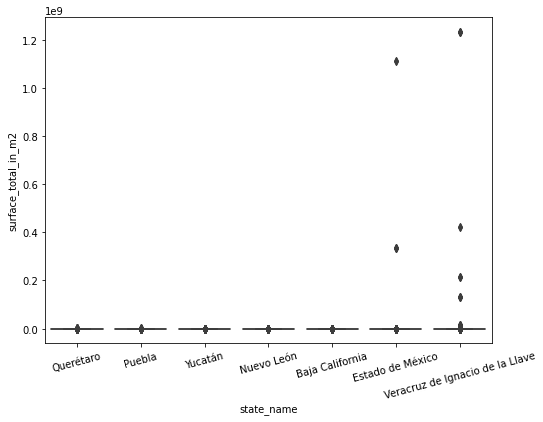

In [220]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_states, x='state_name', y='surface_total_in_m2')
plt.xticks(rotation=15)
plt.show()

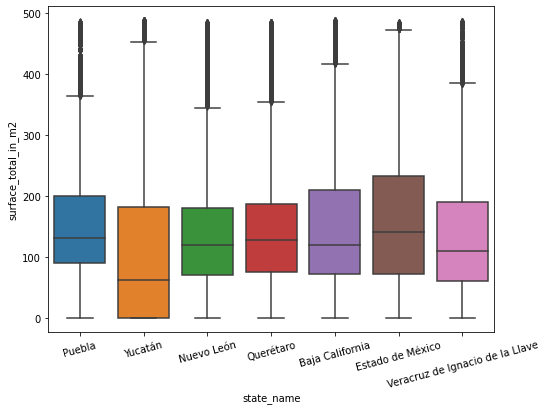

In [259]:
q3 = df_states.surface_total_in_m2.quantile(0.75)
q1 = df_states.surface_total_in_m2.quantile(0.25)
uper_bound = q3 + 1.5 * (q3 - q1)
plt.figure(figsize=(8,6)) 
sns.boxplot(data=df_states[df_states.surface_total_in_m2<uper_bound], x='state_name', y='surface_total_in_m2')
plt.xticks(rotation=15)
plt.show()

* So base on this graph I can see that chances a family finds a property with lower price per square meter is higher for Yucatan rather than the other states. 

### <p style=color:yellow>B. Categorical - Categorical (C->C) relationships </b>

#### <b style=color:#009900>1. Property type VS year and season</b>

In [298]:
A = df.pivot_table(index='year_n_season', columns='property_type', values='title', aggfunc='count')
# Since there are only 26 value for PH property type, I drop it. 
A.drop('PH', axis=1, inplace=True)

In [303]:
A

property_type,apartment,house,store
year_n_season,,,
"(2017, Q1)",23741.0,29399.0,14583.0
"(2017, Q2)",30954.0,39802.0,23130.0
"(2017, Q3)",29262.0,40475.0,17294.0
"(2017, Q4)",33256.0,40656.0,17727.0
"(2018, Q1)",7888.0,9266.0,5058.0


In [299]:
s_2017_q1_counter = A[0:1]
s_2017_q2_counter = A[1:2]
s_2017_q3_counter = A[2:3]
s_2017_q4_counter = A[3:4]
s_2018_q1_counter = A[4:5]

s_2017_q1_percentage = s_2017_q1_counter.values / A.sum(axis=1)[0]
s_2017_q2_percentage = s_2017_q2_counter.values / A.sum(axis=1)[1]
s_2017_q3_percentage = s_2017_q3_counter.values / A.sum(axis=1)[2]
s_2017_q4_percentage = s_2017_q4_counter.values / A.sum(axis=1)[3]
s_2018_q1_percentage = s_2018_q1_counter.values / A.sum(axis=1)[4]

In [300]:
print(s_2017_q1_percentage)

[[0.35056037 0.43410658 0.21533305]]


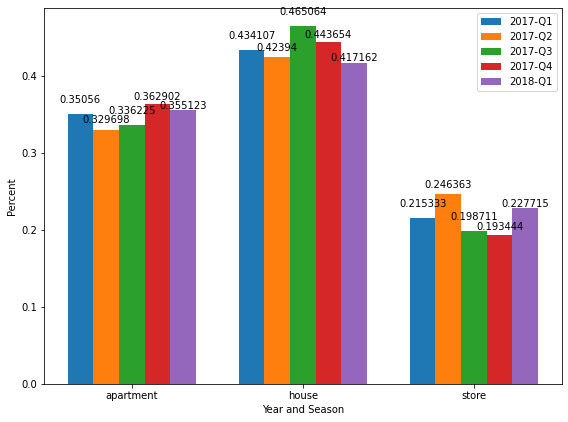

In [304]:
labels = ['apartment', 'house', 'store']
x = np.arange(len(labels))
width = 0.15
fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x-2*width, s_2017_q1_percentage[0], width, label='2017-Q1')
rects2 = ax.bar(x-1*width, s_2017_q2_percentage[0], width, label='2017-Q2')
rects3 = ax.bar(x+0*width, s_2017_q3_percentage[0], width, label='2017-Q3')
rects4 = ax.bar(x+1*width, s_2017_q4_percentage[0], width, label='2017-Q4')
rects5 = ax.bar(x+2*width, s_2018_q1_percentage[0], width, label='2018-Q1')
ax.set_ylabel('Percent')
ax.set_xlabel('Year and Season')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend() 
ax.bar_label(rects1, padding=9)
ax.bar_label(rects2, padding=5)
ax.bar_label(rects3, padding=9)
ax.bar_label(rects4, padding=3)
ax.bar_label(rects5, padding=0)
fig.tight_layout()

* So here it shows that in general house rentals ar more common, and after that it is apartment. Stores are at the end. 
* House rentals, are more on demand in third season. 
* On the other hand, Q4 is showing higher demand for apartment renting. 
* Stores are renting more on Summer season. 
* In generan, as 2018 season 1 in just consist of 1 month, we can argue that there is a huge growth in all types of property, comparing to the same period of 2017. 

#### <b style=color:#009900>2. Property type VS place name. </b>

In [305]:
B = df_places.pivot_table(index='property_type', columns='place_name', values='created_on', aggfunc='count')
B

place_name,Coahuila,Distrito Federal,Mérida,Querétaro,Veracruz
property_type,,,,,
apartment,1496,24267,4997,6133,7940
house,3875,5537,9318,10162,9645
store,6576,4188,3114,4227,4599


In [306]:
apartment_counter = B[0:1]
house_counter = B[1:2]
store_counter = B[2:3]

apartment_percentage = apartment_counter.values / B.sum(axis=1)[0]
house_percentage = house_counter.values / B.sum(axis=1)[1]
store_percentage = store_counter.values / B.sum(axis=1)[2]

apartment_percentage = apartment_percentage[0] * 100
house_percentage = house_percentage[0] * 100
store_percentage = store_percentage[0] * 100

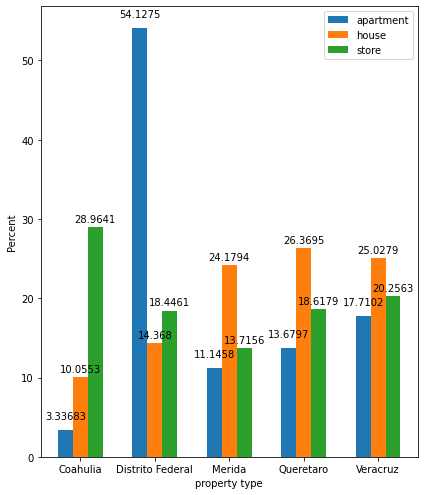

In [309]:
labels = ['Coahulia', 'Distrito Federal', 'Merida', 'Queretaro', 'Veracruz']
x = np.arange(len(labels))
width = 0.2 
fig, ax = plt.subplots(figsize=(6,7))
rects1 = ax.bar(x-1*width, apartment_percentage, width, label='apartment')
rects2 = ax.bar(x+0*width, house_percentage, width, label='house')
rects3 = ax.bar(x+1*width, store_percentage, width, label='store')
ax.set_ylabel('Percent')
ax.set_xlabel('property type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.bar_label(rects1, padding=9)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
fig.tight_layout()

* Stores are more on demand in Coahulia area. 
* Apartments have huge fans in Distrito Federal, while on the other areas, it has the lowest popularity. 
* In the rest of three areas, houses are most popular. 

#### <b style=color:#009900>3. Property type VS State name. </b>

In [310]:
C = df_states.pivot_table(index='property_type', columns='state_name', values='created_on', aggfunc='count')
C

state_name,Baja California,Estado de México,Nuevo León,Puebla,Querétaro,Veracruz de Ignacio de la Llave,Yucatán
property_type,,,,,,,
PH,NaN,7.0,NaN,NaN,NaN,NaN,NaN
apartment,25763.0,11030.0,9579.0,9645.0,8181.0,9443.0,5995.0
house,7942.0,20015.0,11530.0,14440.0,16296.0,13541.0,11914.0
store,6289.0,8805.0,8486.0,3244.0,6221.0,11215.0,3433.0


In [311]:
# Again PH has to be removed as there is no informative value in it. 
C.drop('PH', axis=0, inplace=True)
C 

state_name,Baja California,Estado de México,Nuevo León,Puebla,Querétaro,Veracruz de Ignacio de la Llave,Yucatán
property_type,,,,,,,
apartment,25763.0,11030.0,9579.0,9645.0,8181.0,9443.0,5995.0
house,7942.0,20015.0,11530.0,14440.0,16296.0,13541.0,11914.0
store,6289.0,8805.0,8486.0,3244.0,6221.0,11215.0,3433.0


In [313]:
apartment_counter = C[0:1]
house_counter = C[1:2]
store_counter = C[2:3]

apartment_percentage = apartment_counter.values / C.sum(axis=1)[0]
house_percentage = house_counter.values / C.sum(axis=1)[1]
store_percentage = store_counter.values / C.sum(axis=1)[2]

apartment_percentage = apartment_percentage[0] * 100
house_percentage = house_percentage[0] * 100
store_percentage = store_percentage[0] * 100

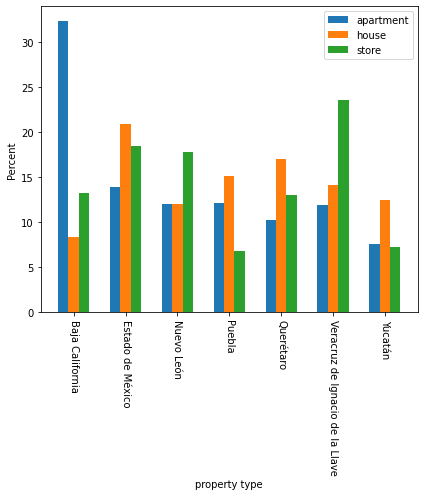

In [465]:
labels = ['Baja California', 'Estado de México', 'Nuevo León', 'Puebla', 'Querétaro', 'Veracruz de Ignacio de la Llave', 'Yucatán']
x = np.arange(len(labels))
width = 0.2 
fig, ax = plt.subplots(figsize=(6,7))
rects1 = ax.bar(x-1*width, apartment_percentage, width, label='apartment')
rects2 = ax.bar(x+0*width, house_percentage, width, label='house')
rects3 = ax.bar(x+1*width, store_percentage, width, label='store')
ax.set_ylabel('Percent')
ax.set_xlabel('property type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
# ax.bar_label(rects1, padding=7)
# ax.bar_label(rects2, padding=0)
# ax.bar_label(rects3, padding=3)
plt.xticks(rotation=-90)
fig.tight_layout()

* Baja California has the highest rate of apartments and lowest of houses. 
* Veracruz has the highest rate of stores, conversely, Puebla has the least ratio of them. 
* People in Estado de Mexico likes the houses the most. 

#### <b style=color:#009900>4. Property type VS title. </b>

In [324]:
df_titles.pivot_table(index='property_type', columns='title', values='created_on', aggfunc='count')

title,Casa renta,Departamento en Renta en Polanco Chapultepec,Local - Comercial en Renta,Local en Renta en Centro,Local en Renta en Torreon Centro
property_type,,,,,
apartment,NaN,1414.0,NaN,NaN,NaN
house,938.0,NaN,NaN,NaN,NaN
store,NaN,NaN,2059.0,1326.0,1113.0


* This has no need to be drown on a graph. Almost NaN value show up. 
* The only interesting thing is that 2059 cases of stores are titled with a 'Comercial' phrase on their titles. 

### <b style=color:yellow>C. Quantitative to Cuantitative (Q-.Q). </b>

In [325]:
df.corr()

,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses
lat,1.000000,-0.556794,0.020346,0.037302,0.037617,-0.002113,0.028141,0.025082,-0.063112,-0.118868
lon,-0.556794,1.000000,-0.012955,-0.037955,-0.038239,-0.000454,-0.006905,-0.000805,-0.004293,0.065242
price,0.020346,-0.012955,1.000000,0.868560,0.866856,-0.001317,0.320541,0.308000,0.032863,0.104015
price_aprox_local_currency,0.037302,-0.037955,0.868560,1.000000,0.999503,-0.001499,0.303385,0.271160,0.052927,0.241534
price_aprox_usd,0.037617,-0.038239,0.866856,0.999503,1.000000,-0.001530,0.302656,0.270014,0.054855,0.239470
surface_total_in_m2,-0.002113,-0.000454,-0.001317,-0.001499,-0.001530,1.000000,-0.000897,-0.000847,0.129201,-0.027528
price_usd_per_m2,0.028141,-0.006905,0.320541,0.303385,0.302656,-0.000897,1.000000,0.935591,-0.065561,0.167661
price_per_m2,0.025082,-0.000805,0.308000,0.271160,0.270014,-0.000847,0.935591,1.000000,-0.065749,0.169390
rooms,-0.063112,-0.004293,0.032863,0.052927,0.054855,0.129201,-0.065561,-0.065749,1.000000,0.028837
expenses,-0.118868,0.065242,0.104015,0.241534,0.239470,-0.027528,0.167661,0.169390,0.028837,1.000000


#### <b style=color:#009900>1. Price local currency VS Price USD. </b>

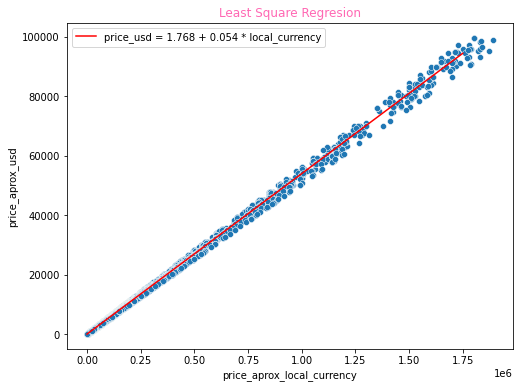

In [352]:
r = pd.DataFrame(df.corr()).loc['price_aprox_local_currency', 'price_aprox_usd']
b = r * (np.std(df.price_aprox_usd) / np.std(df.price_aprox_local_currency))
a = np.mean(df.price_aprox_usd) - b * np.mean(df.price_aprox_local_currency)
x = np.linspace(0, 1750000)
y = a + b * x
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='price_aprox_local_currency', y='price_aprox_usd')
plt.plot(x, y, '-r', label=f'price_usd = {round(a,3)} + {round(b,3)} * local_currency')
plt.legend()
plt.title('Least Square Regresion', color='#FF69B4')
plt.show()

* Pretty much clear that price in local currency and price in usd follow each other. 

#### <b style=color:#009900>2. Price VS Price in usd. </b>

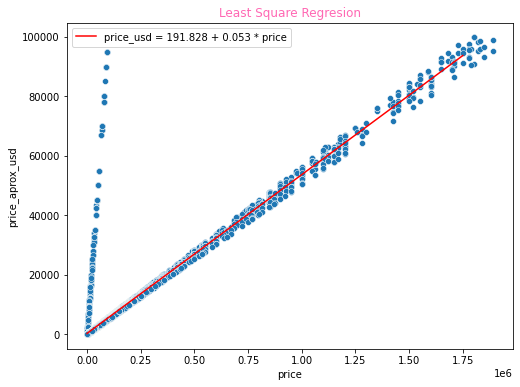

In [353]:
r = pd.DataFrame(df.corr()).loc['price', 'price_aprox_usd']
b = r * (np.std(df.price_aprox_usd) / np.std(df.price))
a = np.mean(df.price_aprox_usd) - b * np.mean(df.price)
x = np.linspace(0, 1750000)
y = a + b * x
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='price', y='price_aprox_usd')
plt.plot(x, y, '-r', label=f'price_usd = {round(a,3)} + {round(b,3)} * price')
plt.legend()
plt.title('Least Square Regresion', color='#FF69B4')
plt.show()

* If it wasn't for the rows in which the price is equal to price aprox local currency, then that outlied branch woudln't show up and the graph was prety much clear. 

#### <b style=color:#009900>3. Price per m2 VS Price usd per m2. </b>

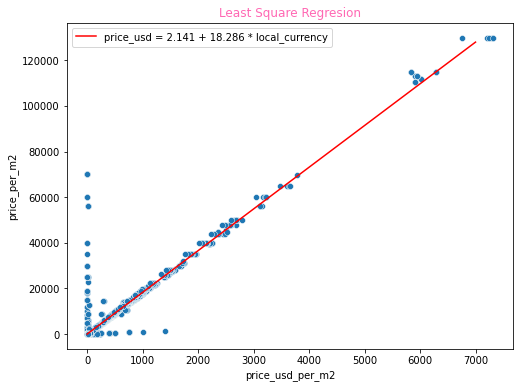

In [356]:
r = pd.DataFrame(df.corr()).loc['price_usd_per_m2', 'price_per_m2']
b = r * (np.std(df.price_per_m2) / np.std(df.price_usd_per_m2))
a = np.mean(df.price_per_m2) - b * np.mean(df.price_usd_per_m2)
x = np.linspace(0, 7000)
y = a + b * x
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='price_usd_per_m2', y='price_per_m2')
plt.plot(x, y, '-r', label=f'price_usd = {round(a,3)} + {round(b,3)} * local_currency')
plt.legend()
plt.title('Least Square Regresion', color='#FF69B4')
plt.show()

* So it is clear the price per m2 in local currency folllows that of usd. 
* Those area that are empty, are caused by NaN values. 
* The branches belong to the rows with currency field as USD. 

#### <b style=color:#009900>4. Price in local currency VS Expences. </b>

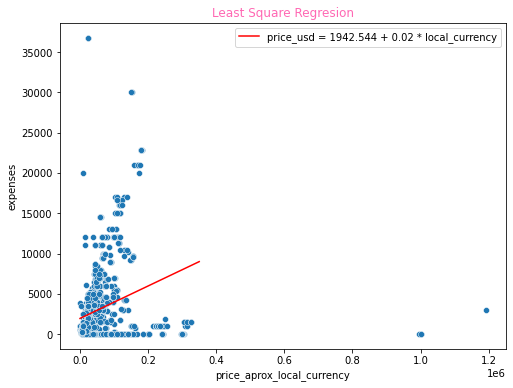

In [360]:
r = pd.DataFrame(df.corr()).loc['price_aprox_local_currency', 'expenses']
b = r * (np.std(df.expenses) / np.std(df.price_aprox_local_currency))
a = np.mean(df.expenses) - b * np.mean(df.price_aprox_local_currency)
x = np.linspace(0, 350000)
y = a + b * x
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='price_aprox_local_currency', y='expenses')
plt.plot(x, y, '-r', label=f'price_usd = {round(a,3)} + {round(b,3)} * local_currency')
plt.legend()
plt.title('Least Square Regresion', color='#FF69B4')
plt.show()

* As the correlation coefficient is 0.24 for this pair, the red regression line is not representing as good as it should be. 

## III. Third, Hypothesis Testing for Variables

### <p style=color:yellow>A. Point Estimation and Hypothesis testing for Categorical Variables. </p>

The Data Science team speculated about the population of rental houses in third season of 2017, and its confidence interval for 95% of confidence. 

In [380]:
X = df[(df.property_type=='apartment') & (df.year_n_season==(2017,'Q1'))]
n = len(df)
p_hat = len(X) / n
print(f'- Point estimation for population proportion of apartments rented of third season of 2017 is: %{p_hat*100:.2f}')

l = p_hat - 2 * np.sqrt(p_hat * (1 - p_hat) / n)
r = p_hat + 2 * np.sqrt(p_hat * (1 - p_hat) / n)
print(f'- Confidence interval for this population is: ({l:.2%}, {r:.2%})') 

- Point estimation for population proportion of apartments rented of third season of 2017 is: %6.55
- Confidence interval for this population is: (6.47%, 6.63%)


An organization in Mexico which has a business in construction, claims that the population of apartments in mexico in 2017 fall is 3%. As a team of data science we belive that it is not ture and the population is higher than what expressed, so we are up to establish a hypothesis testing to see if the claim is true or not. 

##### Step 1: Come up with the Hypothesises. 


In [375]:
# H_0:
p_0 = 0.03
# H_a:
# p_0 > 0.03

##### Step 2: Produce a z_score for this hypothesis.


In [376]:
z_score = (p_hat - p_0) / np.sqrt((p_0 * (1 - p_0) / n))
print(f'Z score of this hyp is: {z_score}')

Z score of this hyp is: 125.26093478959739


##### Step 3: Find the p value of the test. 


In [378]:
# Step 3: Find the p value of the test. 
p_value = 1 - st.norm.cdf(z_score)
print(f'P value of the test is: {p_value}')

P value of the test is: 0.0


##### Step 4: Conclude the result.
There is enough evidence to reject the null hypothesis. So we can say that the population of apartments rent on 2017 fall is more than 3%. 

### <p style=color:yellow>B. Point Estimation and Hypothesis testing for Quantitative Variables. </p>

As a member of data science team, I want to attain the point estimation of the mean and also confidence interval for 95% confidence for rental properties that are in Veracruz area and their surface in square meter is in the range of 100 to 200. 

In [396]:
Y = df[(df.place_name=='Veracruz') & (df.surface_total_in_m2<200) & (df.surface_total_in_m2>100)]['surface_total_in_m2']
m = Y.__len__()
Y_bar = m / n
print(f'- Point estimation for the mean of rental properties in Veracruze area and surface betwee 250 and 750 is: {Y_bar:.2%}')

t_star = st.t.ppf(q=1-.025, df=n-1)
mrg_err = t_star * Y.std() / np.sqrt(n)
print(f'- Confidence interval for this variable is: ({Y_bar-mrg_err:.2%}, {Y_bar+mrg_err:.2%})')

- Point estimation for the mean of rental properties in Veracruze area and surface betwee 250 and 750 is: 1.69%
- Confidence interval for this variable is: (-6.67%, 10.05%)


A recent study conducted by the University of Newmexico in the laboratory of statistics, claims that the average of rental properties in Veracruz which their surface is in the range of 100 and 200 m2 is 5%. As a data scientist team we believe that it must not be that much high. So we mount a hypothesis test upon this issue. 

##### Step 1: Come up with the Hypothesises. 

In [398]:
# H_0: 
mu_0 = .05

# H_a:
# mu_0 < 0.5

##### Step 2: Produce a t_score for this hypothesis. 

In [400]:
t_score = (Y_bar - mu_0) / (Y.std() / np.sqrt(n))
print(f'T_score of the test is: {t_score:.2}')

T_score of the test is: -0.78


##### Step 3: Attain the P value of the test. 

In [401]:
p_value = st.t.cdf(x=t_score, df=n-1)
print(f'P value of the test is: {p_value:.2}')

P value of the test is: 0.22


##### Step 4: Conclude the result.
There is not enough evidence to reject the Null Hypothesis. That is to say, we can not reject that the average number of rental properties in Veracruz which their surfacesis in 100 and 200 m2 is 5%.  

___

# <b style=color:lightgreen>Some Good Findings about the Dataset.</b>

* I would like to investigate a little bit about the stores in the Mexico. 

In [441]:
# First i create the store dataframe. 
df_stores = df[df.property_type=='store']
df_stores.shape

(77792, 17)

* If you want to rent a store in Mexico, what states are more popular?
* Which citis has the largest surfaces for stores?
* Which cities has the cheapest prices?
* Is there any possibilities to know where can one rent a big store with a cheap price?

* Popularity, in my opinion, comes with the amount of money that are spent on an issue. 
* If a certain state is going to be popular, it must be having the higher prices in total. 
- Let's see what are the cities with higher prices.
- Also, conversely, which cities are having cheapest prices.

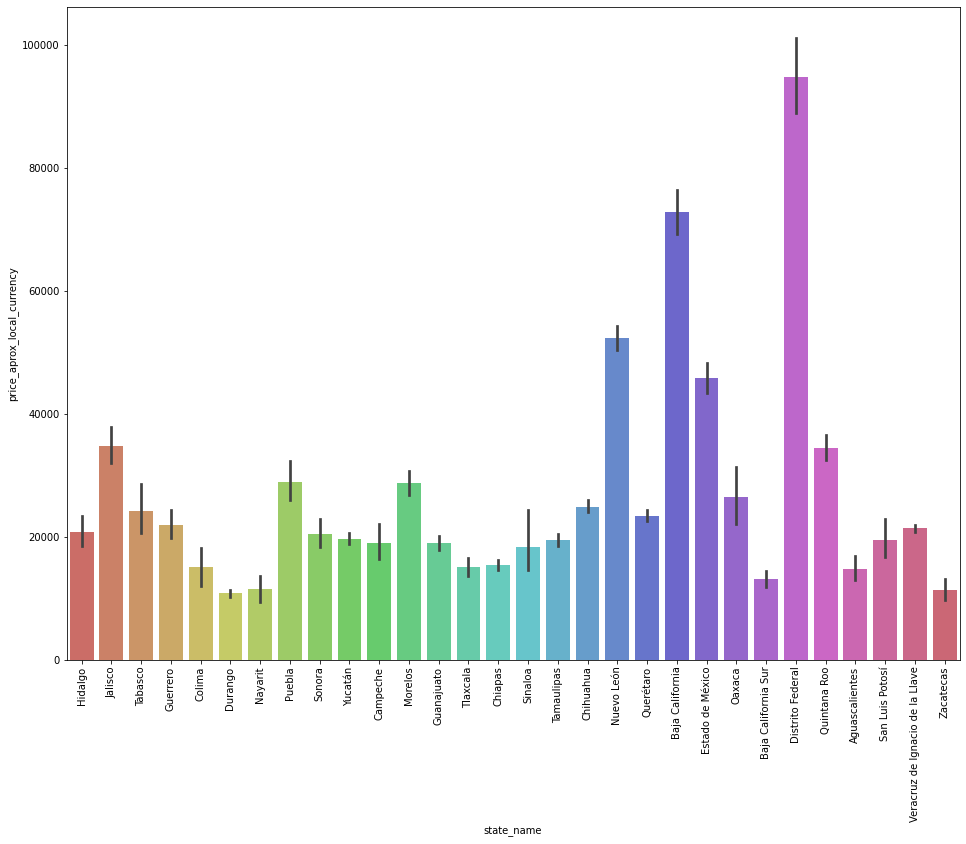

In [463]:
plt.figure(figsize=(16,12))
sns.barplot(data=df_stores, x='state_name', y='price_aprox_local_currency', palette='hls')
plt.xticks(rotation=90)
plt.show()

* Distro Federal, Baja California, Nuevo Leon, Estado de Mexico, and Quintana Roo are the most populat cities as a matter of price and rental expenses. 
* Durago, Nayarit, Zacatecas, Baja California Sur, and Colima are the cheapest cities for renting a store. 

* What are the cities with highest surface of stores?

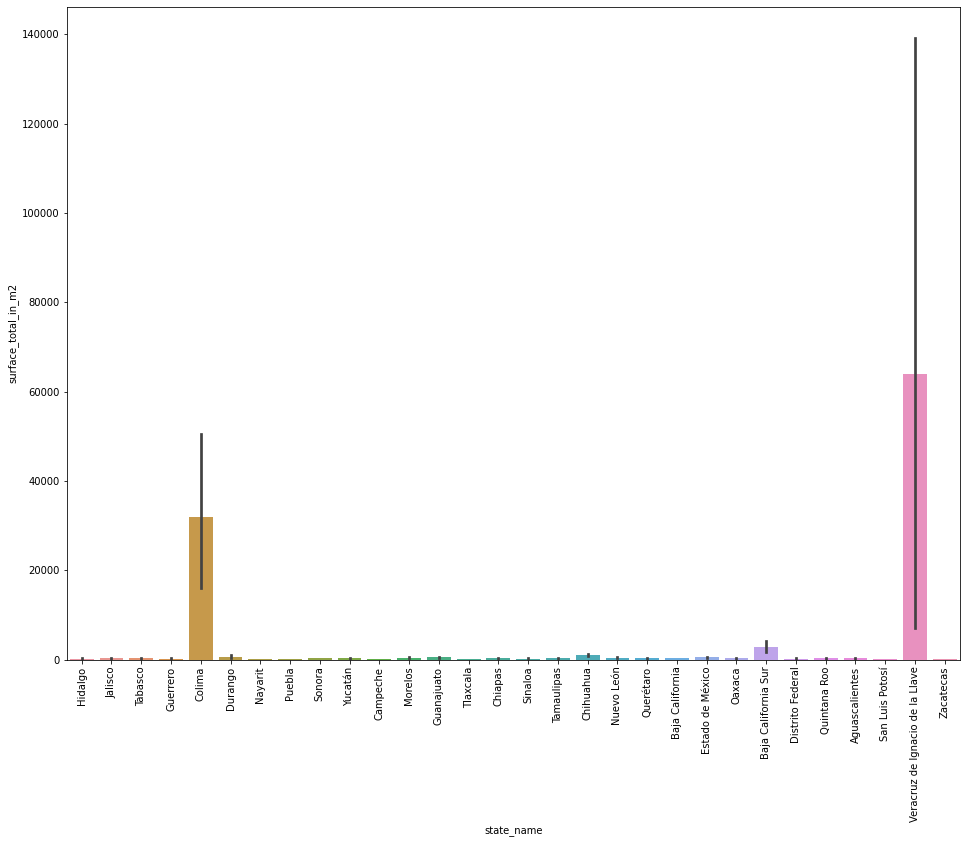

In [456]:
plt.figure(figsize=(16,12))
sns.barplot(data=df_stores, x='state_name', y='surface_total_in_m2')
plt.xticks(rotation=90)
plt.show()

* So Veracruz and Colima are the top two States with amazing difference surface of stores compared to the others. 
* But what about other states?

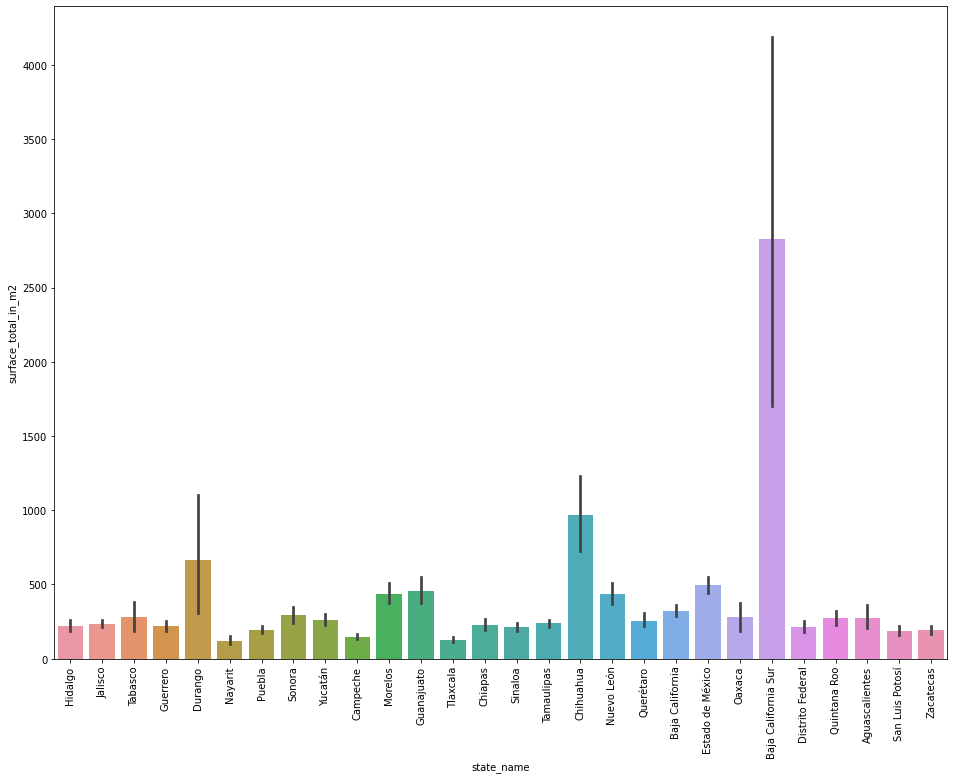

In [464]:
plt.figure(figsize=(16,12))
sns.barplot(data=df_stores[(df_stores.state_name!='Colima') & (df_stores.state_name!='Veracruz de Ignacio de la Llave')], x='state_name', y='surface_total_in_m2')
plt.xticks(rotation=90)
plt.show()

* Among other states, there are Baja California Sure, Chihuahua, and Durango, which are the cities with highest surface area. 